# CS381/780 Data Analytics Final Project

### Due on 12/9/2020 23:59 pm

### Vagner Machado

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on data provided by LendingClub 

https://www.lendingclub.com
    
### The dataset was provided by Kaggle and contains information on loan borrowers 
collected by LendingClub from the year 2007 to 2010. 



Listing of attributes:
    
* credit.policy: a set of guidelines and criteria that decides on credit limits, credit terms, and how to go about delinquent accounts. The borrower either meets the criteria (represented by the integer 1 in our data) or does not (represented by 0 in our data).
* purpose: purpose of the loan contracted (a.i: installment, debt consolidation)
* int.rate: interest rate on the loan.
* installment: monthly payment owed by the borrower.
* log.annual.inc: natural logarithm of self-reported income.
* dti: Debt-to-Income ratio
* fico: FICO score of loan borrowers
* days.with.cr.line: number of days with line of credit.
* revol.bal: revolving balance or the portion of credit that remains unpaid after billing cycle.
* revol.util: revolving utilization or debt-to-limit ratio, debt divided by credit limit.
* inq.last.6mths: inquiries during last 6 months. Inquiries happen when a financial institution checks your credit to make a lending decision, this usually happens when you apply for credit. There are two types of inquiries: hard inquiries or ‘hard pulls’ when you apply for mortgage, credit card… and soft inquiries or ‘soft pulls’ for credit card offers or employment. For the purpose of this project, we will consider the data to represent ‘hard pulls’.
* delinq.2yrs: number of loan delinquencies (30 days or more past due on a payment) reported during the past 2 years.
* pub.rec: number of derogatory public records of loan borrowers.
* not.fully.paid: this column shows whether a loan was not fully paid (1) or fully paid (0)

### Your task in the final project is build the best predictive model to predict what type of borrower will be more likely to default (i.e not fully paid back their loan)

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped 100



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


In [5]:
df = pd.read_csv("lendingclub_loan_data.csv")
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

Values == 1:   1533
Values == 0:   8048
Data rows:     9581


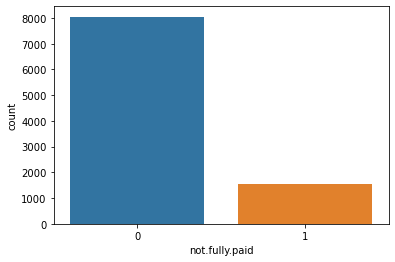

In [6]:
# I wanted to print the count so I see how data cleansing may affect the data for target variables
sns.countplot(df['not.fully.paid'])
print("Values == 1:  ", df[df['not.fully.paid']== 1]['not.fully.paid'].count()) #1533
print("Values == 0:  ", df[df['not.fully.paid']== 0]['not.fully.paid'].count()) #8048
print("Data rows:    ", df.shape[0]) # Seems like the add up!

### Good Luck !!!

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## Initial thoughts

To be properly analyzed, the data needs to be explored with some Exploratory Data Analysis to check for missing values and chose if the rows should be removed or if the values should be filled in. Also, checking the data set for outliers and remove them can give better results. Next, we analyze correlations and pick a set of features that optimizes f1-score for the target variable.

<br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<br><br>

## STEP 1: Initial data exploration

## Let's start the EDA with checking for missing values, outliers and see if dummy variables are required to better use the data


In [7]:
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment           True
log.annual.inc        True
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

## The data frame has missing values for 'installment' and 'log.annual.inc'. Let's visualize it!

<AxesSubplot:>

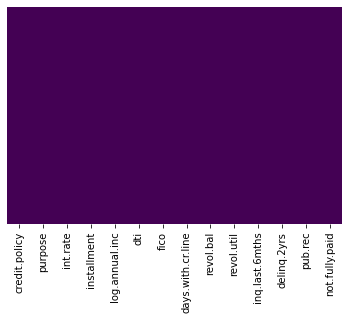

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Visualizing has not helped as maybe the missing data are few and hard to see in the representation. Let's instead check the count.


In [9]:
print('Rows with missing "installment" data\n',df[np.isnan(df['installment'])].installment,"\n\n")
print('Rows with missing "log.annual.inc" data\n',df[np.isnan(df['log.annual.inc'])]['log.annual.inc'],"\n\n")
print('Shape of the edata frame:', df.shape)

Rows with missing "installment" data
 14   NaN
Name: installment, dtype: float64 


Rows with missing "log.annual.inc" data
 14   NaN
Name: log.annual.inc, dtype: float64 


Shape of the edata frame: (9581, 14)


## Seems like the whole data frame has just two values missing, both in the same row. Since there are over 9500 other data rows, I will drop the row with missing data and check for the if the data frame has no missing values.  Since both missing values are in the same row, I will drop the row where 'installment' is NAN. This should take care of both missing data points. 

In [10]:
df = df[~np.isnan(df['installment'])]
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

## With the missing data taken care of, let's check the frame for outliers

<AxesSubplot:>

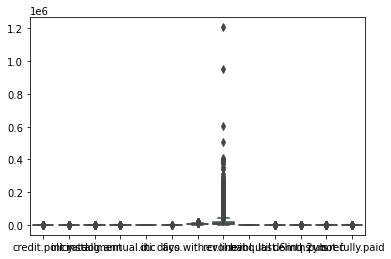

In [11]:
sns.boxplot(data=df)

## Seems like the data is hard to visualize in same plot due to scale. For now, instead of normalizing, let's check the numerical columns with non categorical values, i.e. 0 or 1.



   *********  Plots for  int.rate   **********


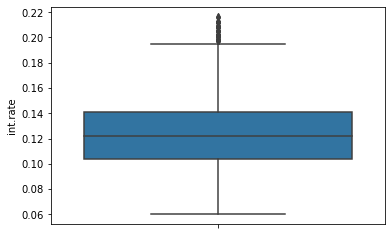

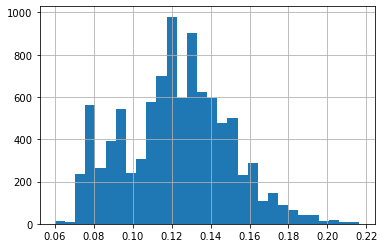



   *********  Plots for  installment   **********


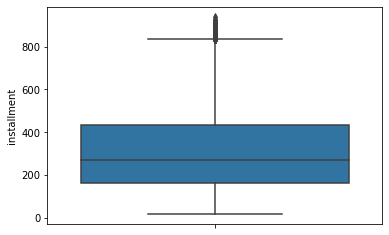

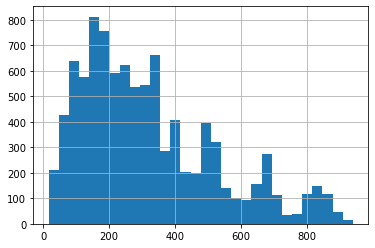



   *********  Plots for  log.annual.inc   **********


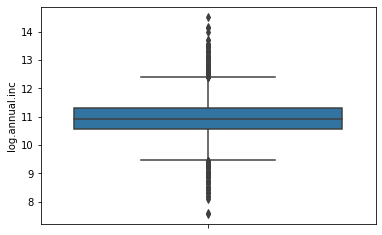

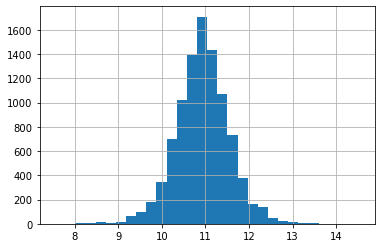



   *********  Plots for  dti   **********


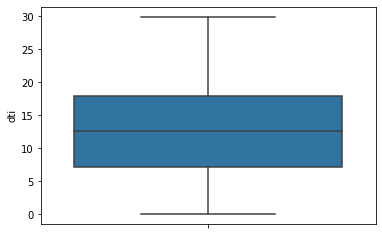

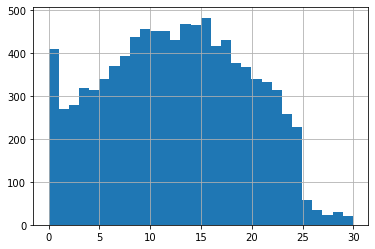



   *********  Plots for  fico   **********


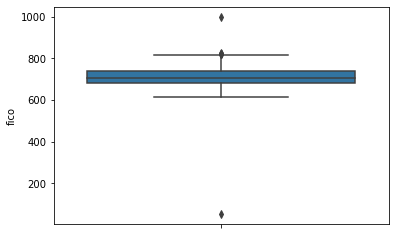

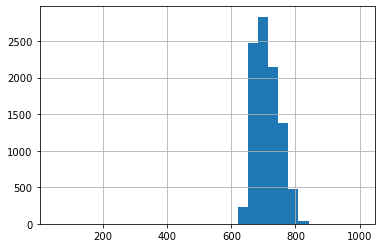



   *********  Plots for  days.with.cr.line   **********


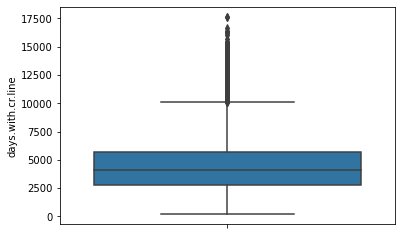

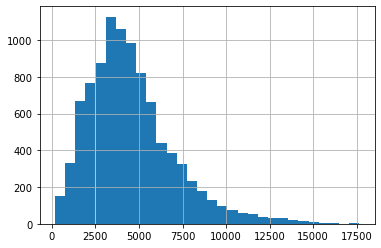



   *********  Plots for  revol.bal   **********


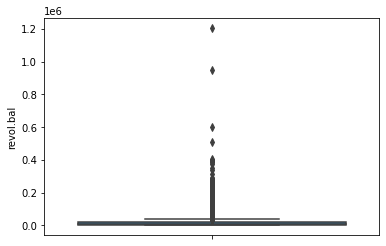

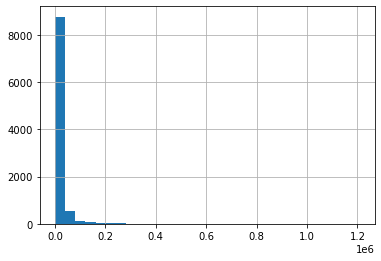



   *********  Plots for  revol.util   **********


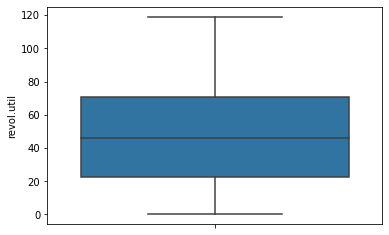

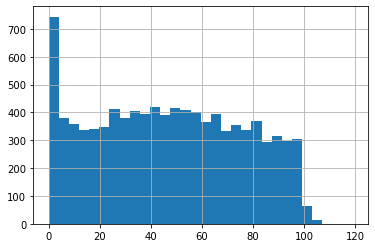



   *********  Plots for  inq.last.6mths   **********


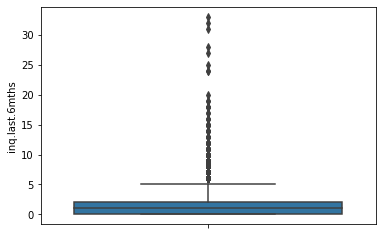

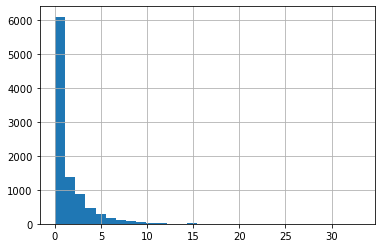



   *********  Plots for  delinq.2yrs   **********


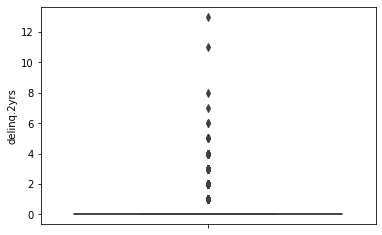

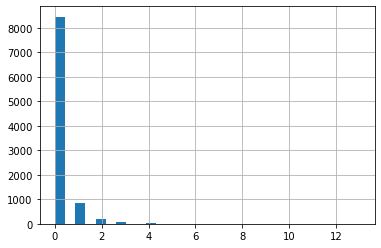



   *********  Plots for  pub.rec   **********


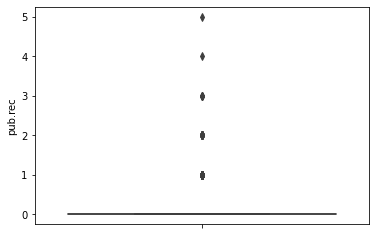

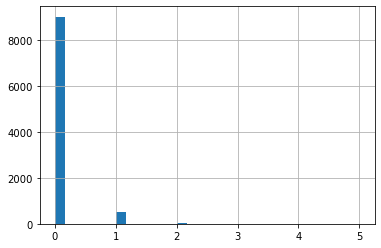

In [12]:
cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
for i in range(0,len(cols)):
    print("\n\n   *********  Plots for ", cols[i], "  **********")
    sns.boxplot(y=df[cols[i]])
    plt.show()
    df[cols[i]].hist(bins = 30, label=cols[i])
    plt.show()
        

## Looking at the data I decided that outliers are in:
## 1."Fico" with values that do not belong in the credit reporting range of 350 to 850.
## 2. "Revolving Balance" has a few outliers over the value of 0.5 x 10 ^ 6
## 3. "Delinquency in Last 2 Years"  has outliers for values greater than 8. 
## 4. "Inquiries Last 6 Months" has outliers for values greater than 15.

## NOTE: I am not sure how to deal with Bad Public Records as outliers are evenly spaced due to the integer nature of its values. For now I will not remove any values from that column but my initial thought was to remove values greater than 3 as there are just a few that can sway the models. 



<AxesSubplot:ylabel='fico'>

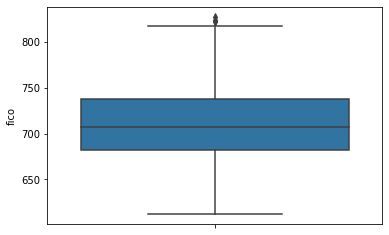

In [13]:
# 1."Fico" with values that do not belong in the credit reporting range of 350 to 850.
dfCopy = df;
df = df[df['fico'] >= 350]
df = df[df['fico'] <= 850]
sns.boxplot(y=df['fico']) 

## The Fico data point looks much better. Let's do the same for the other columns with outliers.

<AxesSubplot:ylabel='revol.bal'>

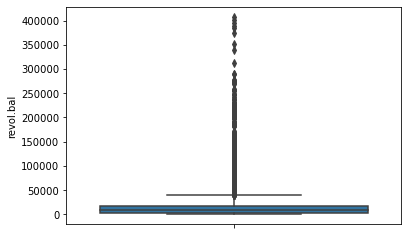

In [14]:
#2. "Revolving Balance" has a few outliers over the value of 0.5 x 10 ^ 6
df = df[df['revol.bal'] <= 0.5*(10**6)]
sns.boxplot(y=df['revol.bal']) 

<AxesSubplot:ylabel='delinq.2yrs'>

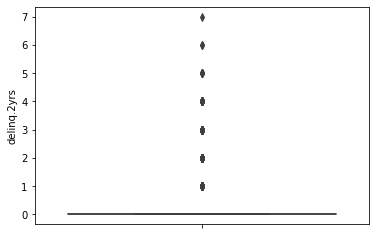

In [15]:
#3. "Delinquency in Last 2 Years" has outliers for values greater than 8.
df = df[df['delinq.2yrs'] < 8]
sns.boxplot(y=df['delinq.2yrs']) 

#NOTE: The result of this cleansing resembles the "Bad Public Records" set, so I think I do
#      not have to remove outliers from it as both columns have evenly spaced outliers.
#      not to mention they may be crucial to get better results.

<AxesSubplot:ylabel='inq.last.6mths'>

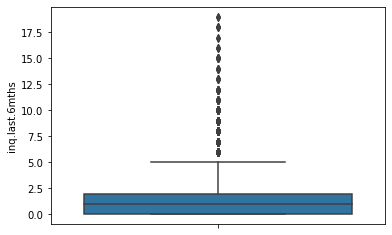

In [16]:
#4. "Inquiries Last 6 Months" has outliers for values greater than 15.
df = df[df['inq.last.6mths'] < 20]
sns.boxplot(y=df['inq.last.6mths']) 

## The data outside quartiles are evenly spaced and all columns do not have any outlier as before the cleansing. 

In [17]:
#Let's quick check some correlations.
df.corr()

credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.293027     0.058364        0.037538   
int.rate               -0.293027  1.000000     0.276012        0.054491   
installment             0.058364  0.276012     1.000000        0.447937   
log.annual.inc          0.037538  0.054491     0.447937        1.000000   
dti                    -0.091423  0.220367     0.050234       -0.054216   
fico                    0.345935 -0.715095     0.085249        0.115591   
days.with.cr.line       0.099640 -0.124912     0.182250        0.335367   
revol.bal              -0.196463  0.092221     0.254818        0.399641   
revol.util             -0.104009  0.464986     0.080798        0.054280   
inq.last.6mths         -0.550984  0.213590    -0.002585        0.034400   
delinq.2yrs            -0.069428  0.158322    -0.003327        0.026295   
pub.rec                -0.052908  0.097726    -0.032170        0.015362   
not.fully.paid         -0.156942  0.159574     0.049597       -0.034579   

                        dti      fico  days.with.cr.line  revol.bal  \
credit.policy     -0.091423  0.345935           0.099640  -0.196463   
int.rate           0.220367 -0.715095          -0.124912   0.092221   
installment        0.050234  0.085249           0.182250   0.254818   
log.annual.inc    -0.054216  0.115591           0.335367   0.399641   
dti                1.000000 -0.241876           0.059579   0.217960   
fico              -0.241876  1.000000           0.263950  -0.014163   
days.with.cr.line  0.059579  0.263950           1.000000   0.248376   
revol.bal          0.217960 -0.014163           0.248376   1.000000   
revol.util         0.337039 -0.542370          -0.025072   0.225737   
inq.last.6mths     0.030029 -0.181843          -0.037045   0.010917   
delinq.2yrs       -0.014592 -0.220530           0.088787  -0.034486   
pub.rec            0.006605 -0.147207           0.072175  -0.041177   
not.fully.paid     0.037037 -0.149390          -0.030203   0.051219   

                   revol.util  inq.last.6mths  delinq.2yrs   pub.rec  \
credit.policy       -0.104009       -0.550984    -0.069428 -0.052908   
int.rate             0.464986        0.213590     0.158322  0.097726   
installment          0.080798       -0.002585    -0.003327 -0.032170   
log.annual.inc       0.054280        0.034400     0.026295  0.015362   
dti                  0.337039        0.030029    -0.014592  0.006605   
fico                -0.542370       -0.181843    -0.220530 -0.147207   
days.with.cr.line   -0.025072       -0.037045     0.088787  0.072175   
revol.bal            0.225737        0.010917    -0.034486 -0.041177   
revol.util           1.000000       -0.014320    -0.042605  0.067900   
inq.last.6mths      -0.014320        1.000000     0.016880  0.075384   
delinq.2yrs         -0.042605        0.016880     1.000000  0.003042   
pub.rec              0.067900        0.075384     0.003042  1.000000   
not.fully.paid       0.081872        0.151481     0.012646  0.049575   

                   not.fully.paid  
credit.policy           -0.156942  
int.rate                 0.159574  
installment              0.049597  
log.annual.inc          -0.034579  
dti                      0.037037  
fico                    -0.149390  
days.with.cr.line       -0.030203  
revol.bal                0.051219  
revol.util               0.081872  
inq.last.6mths           0.151481  
delinq.2yrs              0.012646  
pub.rec                  0.049575  
not.fully.paid           1.000000

## A quick look at the correlation table demonstrates that the column "purpose" is not displayed as it has non numerical values. A closer look shows that for over 9500 data rows, that column assumes only seven different values, making a good candidate to become a dummy variable. 

In [18]:
#Initial inspection of the 'purpose' variable
print(df.purpose.unique())

['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


In [19]:
#Let's setup the dummy variables for them
loan_purp = pd.get_dummies(df['purpose'], drop_first=True)

#Append to original data frame
df = pd.concat([df,loan_purp], axis = 1)
df.head() 


credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  credit_card  debt_consolidation  \
0            0        0               0            0                   1   
1            0        0               0            1                   0   
2            0        0               0            0                   1   
3            0        0               0            0                   1   
4            1        0               0            1                   0   

   educational  home_improvement  major_purchase  small_business  
0            0                 0               0               0  
1            0                 0               0               0  
2            0                 0               0               0  
3            0                 0               0               0  
4            0                 0               0               0

In [20]:
#Let's get rid of of the 'purpose' column
df.shape
df.drop('purpose',axis=1, inplace=True)
df.head() 

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  credit_card  debt_consolidation  educational  \
0        0               0            0                   1            0   
1        0               0            1                   0            0   
2        0               0            0                   1            0   
3        0               0            0                   1            0   
4        0               0            1                   0            0   

   home_improvement  major_purchase  small_business  
0                 0               0               0  
1                 0               0               0  
2                 0               0               0  
3                 0               0               0  
4                 0               0               0

In [21]:
#Initially we had 14 columns, drop 'purpose' and from 7 'purposes' add 6 dummy columns. That is 19 columns.
print("Shape of frame: ",df.shape)   #The data fram seems right to me. 

Shape of frame:  (9562, 19)


## The initial data frame had 9581 rows, meaning that the cleansing removed only 19 rows of data, although those extreme values could negatively impact the models. Let's see how it affected the target variable.

Values == 1:   1527
Values == 0:   8035
Data rows:     9562


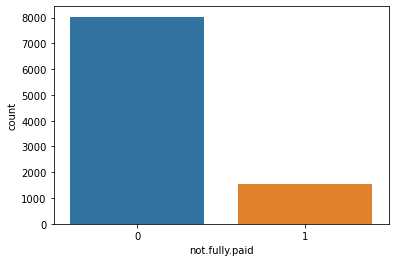

In [22]:
sns.countplot(df['not.fully.paid'])
print("Values == 1:  ", df[df['not.fully.paid']== 1]['not.fully.paid'].count()) #1533 -> 1527
print("Values == 0:  ", df[df['not.fully.paid']== 0]['not.fully.paid'].count()) #8048 -> 8035
print("Data rows:    ", df.shape[0]) # Seems like the add up!

## I am checking the before and after to see if cleansing had removed only rows that possibly completely eliminated one of values for the target variable. Seems like just a few rows of outliers were removed and the data frame still has over 99% of its original data after cleansing. I am happy with the result of the cleansing and going back to the beginning of this document to check for any inconsistencies that I did not initially see. 

## Upon checking the results above, I find they reflect what I intended to do. However, I would like to run a pairplot to see if there are any other information that I can absorb about the frame, any further outliers or an insight that I had not in mind initially.


In [23]:
#This was very time consuming so I will just pick the non-binary values
#sns.pairplot(df)

In [24]:
dfPair = df
keeper = ['int.rate','installment','log.annual.inc','dti', 'fico','days.with.cr.line','revol.bal','revol.util']
for col in dfPair.columns: 
    if col not in keeper:
        dfPair = dfPair.drop(col, axis=1)
dfPair.head()
        

int.rate  installment  log.annual.inc    dti  fico  days.with.cr.line  \
0    0.1189       829.10       11.350407  19.48   737        5639.958333   
1    0.1071       228.22       11.082143  14.29   707        2760.000000   
2    0.1357       366.86       10.373491  11.63   682        4710.000000   
3    0.1008       162.34       11.350407   8.10   712        2699.958333   
4    0.1426       102.92       11.299732  14.97   667        4066.000000   

   revol.bal  revol.util  
0      28854        52.1  
1      33623        76.7  
2       3511        25.6  
3      33667        73.2  
4       4740        39.5

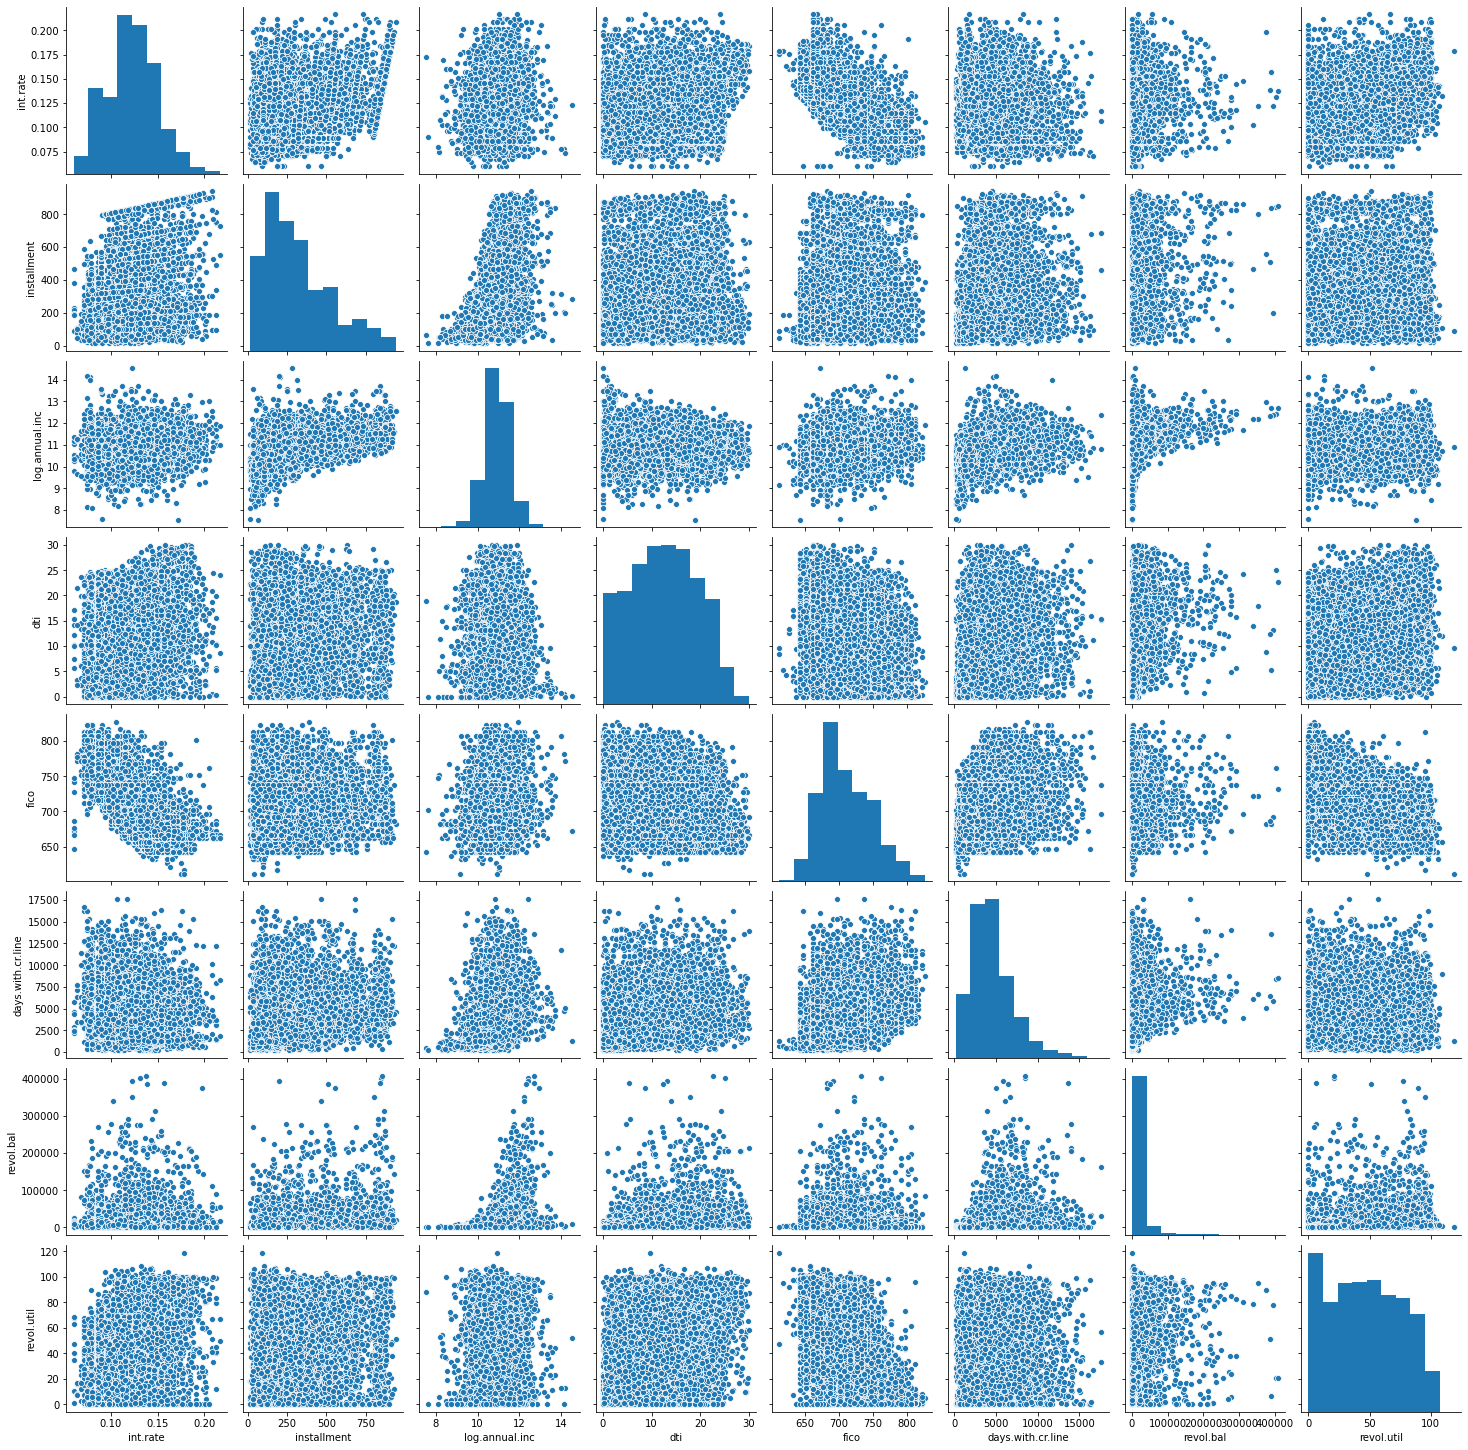

In [25]:
sns.pairplot(dfPair)

## I do not see any clear oulier in the pair plot. However, I see that the 'Revolving Balance' has a few values over 350,000 that are significantly distanced from the  possible 'centroid' for that set. Since they are not completely far and isolated from the rest of the data, I will, for now, keep those values. Lastly, 'revol.util' has one value around 120 that stands out of the herd, but not outrageouly far, so it will also stay. Depending on model scores, I may revisit, drop those values and and retest. With this in mind, I feel confident proceeding to modeling.


## Regarding normalization, I gave it a lot of thought and decided to not normalize columns  because we are not comparing the feature columns directly and one column is not dependent on another. The same was not seen in the muffin vs cupcake exemple. There, normalizing was needed to achieve a standard 100% of ingredients for each individual recipe. Lastly, I opted to not normalize the data because I think normalizing will, ironically, bring more extreme values into an average range, possibly changing the kurtosis to that distributions and, in the end, adding possible bias to the model results. Case the columns were dependent on one another, or if each were part of a whole, I would certainly normalize. 

## Note: As a winter project, I want to redo this project with normalized data frame and see if I can achieve a higher f1-score. Before that, I wanna be able to read a bit more about general rules for normalization. Below are my models!
<br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## STEP 2: Creating Models

## After reviewing the EDA and data cleansing process, it is time build models and validate results. A linear regression is not fit for this data set as that tool is applied to continuous variables, which is not the nature of our target variable, 'not.paid.fully'. The logical second thought is the run a Logistic Regression as we are trying to figure out a binary value (i.e.: yes/no, ham/spam, 0/1). Let's set that up next.

In [26]:
#Chcking if original data did not get entangled woth dfPair
df.head()


credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  credit_card  debt_consolidation  educational  \
0        0               0            0                   1            0   
1        0               0            1                   0            0   
2        0               0            0                   1            0   
3        0               0            0                   1            0   
4        0               0            1                   0            0   

   home_improvement  major_purchase  small_business  
0                 0               0               0  
1                 0               0               0  
2                 0               0               0  
3                 0               0               0  
4                 0               0               0

## So my intitial thinking about the logistic regression is that I would like to decide which variables to use with it. Let's check out again correlation and some count plots.

In [27]:
df.corr()

credit.policy  int.rate  installment  log.annual.inc  \
credit.policy            1.000000 -0.293027     0.058364        0.037538   
int.rate                -0.293027  1.000000     0.276012        0.054491   
installment              0.058364  0.276012     1.000000        0.447937   
log.annual.inc           0.037538  0.054491     0.447937        1.000000   
dti                     -0.091423  0.220367     0.050234       -0.054216   
fico                     0.345935 -0.715095     0.085249        0.115591   
days.with.cr.line        0.099640 -0.124912     0.182250        0.335367   
revol.bal               -0.196463  0.092221     0.254818        0.399641   
revol.util              -0.104009  0.464986     0.080798        0.054280   
inq.last.6mths          -0.550984  0.213590    -0.002585        0.034400   
delinq.2yrs             -0.069428  0.158322    -0.003327        0.026295   
pub.rec                 -0.052908  0.097726    -0.032170        0.015362   
not.fully.paid          -0.156942  0.159574     0.049597       -0.034579   
credit_card              0.003162 -0.041918     0.001192        0.074439   
debt_consolidation       0.019148  0.124153     0.162021       -0.025211   
educational             -0.032113 -0.019413    -0.094672       -0.119918   
home_improvement         0.005153 -0.050442     0.022962        0.117028   
major_purchase           0.024669 -0.069268    -0.079905       -0.030842   
small_business          -0.001823  0.150711     0.144480        0.089837   

                         dti      fico  days.with.cr.line  revol.bal  \
credit.policy      -0.091423  0.345935           0.099640  -0.196463   
int.rate            0.220367 -0.715095          -0.124912   0.092221   
installment         0.050234  0.085249           0.182250   0.254818   
log.annual.inc     -0.054216  0.115591           0.335367   0.399641   
dti                 1.000000 -0.241876           0.059579   0.217960   
fico               -0.241876  1.000000           0.263950  -0.014163   
days.with.cr.line   0.059579  0.263950           1.000000   0.248376   
revol.bal           0.217960 -0.014163           0.248376   1.000000   
revol.util          0.337039 -0.542370          -0.025072   0.225737   
inq.last.6mths      0.030029 -0.181843          -0.037045   0.010917   
delinq.2yrs        -0.014592 -0.220530           0.088787  -0.034486   
pub.rec             0.006605 -0.147207           0.072175  -0.041177   
not.fully.paid      0.037037 -0.149390          -0.030203   0.051219   
credit_card         0.084686 -0.012490           0.047148   0.088932   
debt_consolidation  0.179670 -0.154739          -0.008818   0.016324   
educational        -0.035364 -0.013421          -0.042676  -0.038334   
home_improvement   -0.092875  0.097091           0.068212   0.006769   
major_purchase     -0.078097  0.067708          -0.020097  -0.070268   
small_business     -0.069281  0.063696           0.034491   0.068890   

                    revol.util  inq.last.6mths  delinq.2yrs   pub.rec  \
credit.policy        -0.104009       -0.550984    -0.069428 -0.052908   
int.rate              0.464986        0.213590     0.158322  0.097726   
installment           0.080798       -0.002585    -0.003327 -0.032170   
log.annual.inc        0.054280        0.034400     0.026295  0.015362   
dti                   0.337039        0.030029    -0.014592  0.006605   
fico                 -0.542370       -0.181843    -0.220530 -0.147207   
days.with.cr.line    -0.025072       -0.037045     0.088787  0.072175   
revol.bal             0.225737        0.010917    -0.034486 -0.041177   
revol.util            1.000000       -0.014320    -0.042605  0.067900   
inq.last.6mths       -0.014320        1.000000     0.016880  0.075384   
delinq.2yrs          -0.042605        0.016880     1.000000  0.003042   
pub.rec               0.067900        0.075384     0.003042  1.000000   
not.fully.paid        0.081872        0.151481     0.012646  0.049575   
credit_card           0.091251      

## Let's check out the count plots for the correlations, positive or negative, to 'not.paid.fully'. I did not include features with correlation near zero.


     ***** Count plot for  credit_card  *****


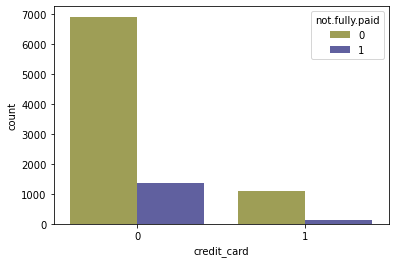

     ***** Count plot for  fico  *****


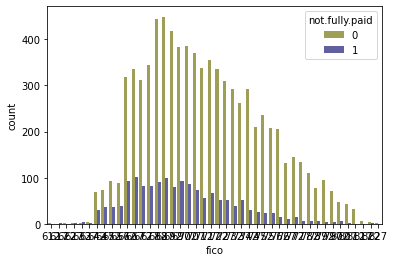

     ***** Count plot for  credit.policy  *****


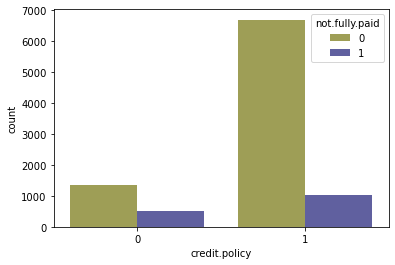

     ***** Count plot for  log.annual.inc  *****


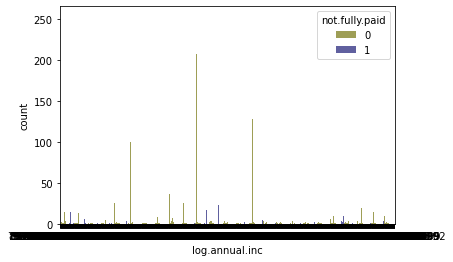

     ***** Count plot for  days.with.cr.line  *****


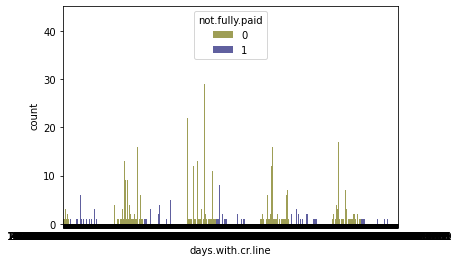

     ***** Count plot for  home_improvement  *****


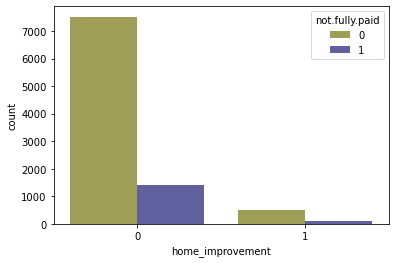

     ***** Count plot for  installment  *****


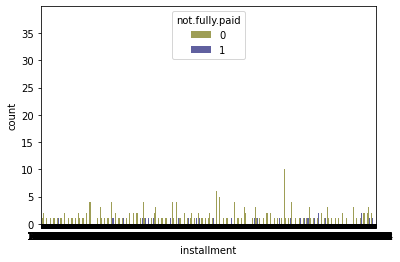

     ***** Count plot for  educational  *****


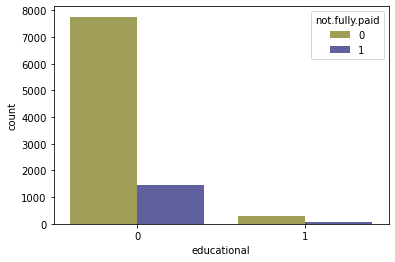

     ***** Count plot for  int.rate  *****


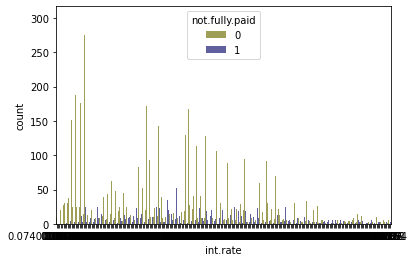

     ***** Count plot for  pub.rec  *****


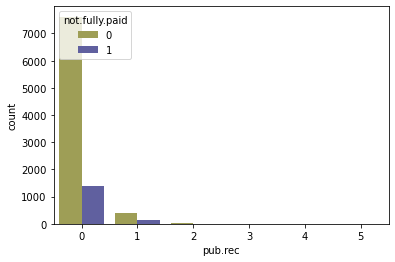

     ***** Count plot for  inq.last.6mths  *****


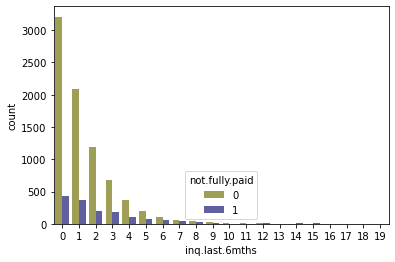

     ***** Count plot for  revol.util  *****


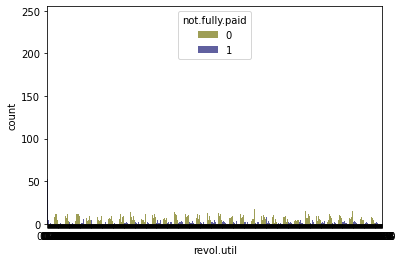

     ***** Count plot for  small_business  *****


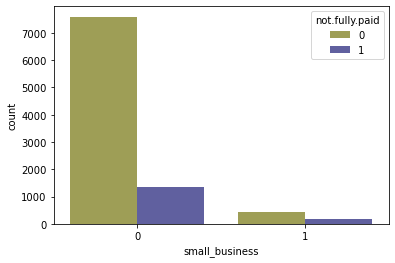

     ***** Count plot for  revol.bal  *****


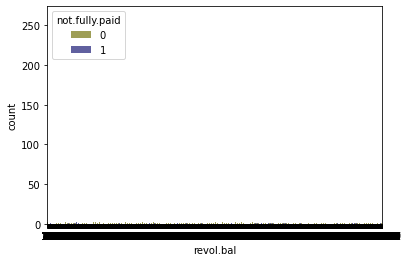

In [28]:
listOfCorr = ['credit_card', 'fico', 'credit.policy', 'log.annual.inc', 'days.with.cr.line', 'home_improvement','installment','educational','int.rate','pub.rec','inq.last.6mths','revol.util','small_business', 'revol.bal']
for i in range(0,len(listOfCorr)):
    sns.countplot(x=listOfCorr[i], hue='not.fully.paid',data=df, palette='gist_stern_r')
    print("     ***** Count plot for ", listOfCorr[i]," *****" )
    plt.show()

## The count plots demonstate the columns have counts that can be used to predict if a loan will paid in full or not. 'revol.util' is a bit difficult to see but a closer look by zooming on the plot demonstrates that 'not.paid.fully' = 0 has significantly greater and wider peaks than that value = 1, so a contrast can be drawn. With that said, I would like to run, initially, two logistic regressions: One using the top six correlations, positive or negative, and other using all the features and proceed with the best model for validation.

In [29]:
df_top_six= df[['credit.policy','int.rate','fico','inq.last.6mths','revol.util','small_business', 'not.fully.paid']]
df_top_six.head()

credit.policy  int.rate  fico  inq.last.6mths  revol.util  small_business  \
0              1    0.1189   737               0        52.1               0   
1              1    0.1071   707               0        76.7               0   
2              1    0.1357   682               1        25.6               0   
3              1    0.1008   712               1        73.2               0   
4              1    0.1426   667               0        39.5               0   

   not.fully.paid  
0               0  
1               0  
2               0  
3               0  
4               0

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(df_top_six.drop('not.fully.paid',axis=1), 
                                                    df_top_six['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=101)

pmt_log_reg_model = LogisticRegression()
pmt_log_reg_model.fit(X_train, Y_train)
predictions_log_reg = pmt_log_reg_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(Y_test, predictions_log_reg))
print("Classification Table with top six correlation:\n\n",classification_report(Y_test, predictions_log_reg))
print("Accuracy Score with top six correlations: ", accuracy_score(Y_test, predictions_log_reg))

Confusion Matrix:
 [[1618    5]
 [ 286    4]]
Classification Table with top six correlation:

               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.44      0.01      0.03       290

    accuracy                           0.85      1913
   macro avg       0.65      0.51      0.47      1913
weighted avg       0.79      0.85      0.78      1913

Accuracy Score with top six correlations:  0.8478829064296916


## So the results for the top six correlations is coming in with f1-score 0.92 for target variable = 0 and 0.03 for target variable = 1 while having accuracy score of 84.79%. Since we are focusing on target variable = 1, this is a bad model! Let's try the logistic regression with all the columns used as features. 

In [31]:
copy_df = df.copy(deep=True)
copy_df.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  credit_card  debt_consolidation  educational  \
0        0               0            0                   1            0   
1        0               0            1                   0            0   
2        0               0            0                   1            0   
3        0               0            0                   1            0   
4        0               0            1                   0            0   

   home_improvement  major_purchase  small_business  
0                 0               0               0  
1                 0               0               0  
2                 0               0               0  
3                 0               0               0  
4                 0               0               0

In [32]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(copy_df.drop('not.fully.paid',axis=1), 
                                                    copy_df['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=101)

pmt_log_reg_model1 = LogisticRegression()
pmt_log_reg_model1.fit(X_train1, Y_train1)
predictions_log_reg1 = pmt_log_reg_model1.predict(X_test1)
print("Confusion Matrix:\n", confusion_matrix(Y_test1, predictions_log_reg1))
print("Classification Table with all columns as features:\n\n",classification_report(Y_test1, predictions_log_reg1))
print("Accuracy Score with all columns as features: ", accuracy_score(Y_test1, predictions_log_reg1))

Confusion Matrix:
 [[1618    5]
 [ 287    3]]
Classification Table with all columns as features:

               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.38      0.01      0.02       290

    accuracy                           0.85      1913
   macro avg       0.61      0.50      0.47      1913
weighted avg       0.78      0.85      0.78      1913

Accuracy Score with all columns as features:  0.847360167276529


## As showns above, using all the columns as features returned results slightly lower than using the highest six correlations. f1-score for target variable = 0 remained 0.92 while for target variable = 1 dropped from 0.03 to 0.02. The accuracy score is also slightly lower, going from 84.79% down to 84.74%, that is, half of a percentage point. This got me thinking that I want to try yet another set of features before proceeding to cross validation of the best logistic regression. For this, I am picking the top 4 correlations, all with values around abs(15).

In [33]:
df_top_4 = df[['credit.policy','int.rate','fico','inq.last.6mths', 'not.fully.paid']]
df_top_4.head()

credit.policy  int.rate  fico  inq.last.6mths  not.fully.paid
0              1    0.1189   737               0               0
1              1    0.1071   707               0               0
2              1    0.1357   682               1               0
3              1    0.1008   712               1               0
4              1    0.1426   667               0               0

In [34]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_top_4.drop('not.fully.paid', axis=1), 
                                                    df_top_4['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=101)

pmt_log_reg_model2 = LogisticRegression()
pmt_log_reg_model2.fit(X_train2, Y_train2)
predictions_log_reg2 = pmt_log_reg_model2.predict(X_test2)
print("Confusion Matrix:\n", confusion_matrix(Y_test2, predictions_log_reg2))
print("Classification Table with top 4 correlations as features:\n\n",classification_report(Y_test2, predictions_log_reg2))
print("Accuracy Score with top 4 corelations as features: ", accuracy_score(Y_test2, predictions_log_reg2))

Confusion Matrix:
 [[1619    4]
 [ 288    2]]
Classification Table with top 4 correlations as features:

               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.33      0.01      0.01       290

    accuracy                           0.85      1913
   macro avg       0.59      0.50      0.47      1913
weighted avg       0.77      0.85      0.78      1913

Accuracy Score with top 4 corelations as features:  0.847360167276529


## Since the f1-score for variable = 1 are getting worse, I will further explore features. As the next attempt, let's see the results for positive correlations to target variable.

In [35]:
positive = df[['not.fully.paid','home_improvement','installment','educational','int.rate','pub.rec','inq.last.6mths','revol.util','small_business', 'revol.bal']]
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(positive.drop('not.fully.paid', axis=1), 
                                                    positive['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=101)

pmt_log_reg_model2 = LogisticRegression()
pmt_log_reg_model2.fit(X_train2, Y_train2)
predictions_log_reg2 = pmt_log_reg_model2.predict(X_test2)
print("Confusion Matrix:\n", confusion_matrix(Y_test2,predictions_log_reg2))
print("Classification Table with positive correlations as features:\n\n",classification_report(Y_test2, predictions_log_reg2))
print("Accuracy Score with positive correlations as features: ", accuracy_score(Y_test2, predictions_log_reg2))

Confusion Matrix:
 [[1619    4]
 [ 290    0]]
Classification Table with positive correlations as features:

               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913

Accuracy Score with positive correlations as features:  0.8463146889702039


## The positive correlations have not shown any improvement. Lastly, let's see the Logistic Regression for some negative correlations

In [36]:
negative = df[['not.fully.paid','credit_card', 'fico', 'credit.policy', 'log.annual.inc', 'days.with.cr.line']]
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(negative.drop('not.fully.paid', axis=1), 
                                                    negative['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=101)

pmt_log_reg_model2 = LogisticRegression()
pmt_log_reg_model2.fit(X_train2, Y_train2)
predictions_log_reg2 = pmt_log_reg_model2.predict(X_test2)
print("Confusion Matrix:\n", confusion_matrix(Y_test2,predictions_log_reg2))
print("Classification Table with negative correlations as features:\n\n",classification_report(Y_test2, predictions_log_reg2))
print("Accuracy Score with negative correlations as features: ", accuracy_score(Y_test2, predictions_log_reg2))

Confusion Matrix:
 [[1623    0]
 [ 290    0]]
Classification Table with negative correlations as features:

               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913

Accuracy Score with negative correlations as features:  0.8484056455828541


## I am very suprised for such a low result for f1-score for variable = 1. I retraced my code and could not see any wrong doing. Hopefully, the next models will result in better score. Since the f1-score is to be used to pick the best model, I chose to proceed for validation with the model using the top six correlations as the value for variable = 1 is greater than other two models. Now, let's perform a 20 fold cross validation with data set containing the top six correlations to target variable.

In [37]:
from sklearn.metrics import precision_recall_fscore_support
import random
accuracyValues = []
f1a = []
f1b = []
for i in range(20):
    X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df_top_six.drop('not.fully.paid',axis=1), 
                                                    df_top_six['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=random.randint(1,1000))
    model3 = LogisticRegression()
    model3.fit(X_train3, Y_train3)
    Y_pred3 = model3.predict(X_test3)
    report3  = classification_report(Y_test3, Y_pred3)
    acc = accuracy_score(Y_test3, Y_pred3)
    accuracyValues.append(acc)
    rep = precision_recall_fscore_support(Y_test3, Y_pred3, average=None)
    f1a.append(rep[2][0])
    f1b.append(rep[2][1])
    print('Trial {}:\t Accuracy Score: {}\t f1-score: {} '.format(i, acc.round(3), rep[2]))

Trial 0:	 Accuracy Score: 0.844	 f1-score: [0.91483908 0.05079365] 
Trial 1:	 Accuracy Score: 0.846	 f1-score: [0.91626455 0.02640264] 
Trial 2:	 Accuracy Score: 0.826	 f1-score: [0.90481651 0.01775148] 
Trial 3:	 Accuracy Score: 0.855	 f1-score: [0.92168504 0.04152249] 
Trial 4:	 Accuracy Score: 0.855	 f1-score: [0.92186178 0.01423488] 
Trial 5:	 Accuracy Score: 0.844	 f1-score: [0.91493599 0.03858521] 
Trial 6:	 Accuracy Score: 0.85	 f1-score: [0.91879614 0.05921053] 
Trial 7:	 Accuracy Score: 0.832	 f1-score: [0.90789474 0.02424242] 
Trial 8:	 Accuracy Score: 0.825	 f1-score: [0.90398395 0.00593472] 
Trial 9:	 Accuracy Score: 0.844	 f1-score: [0.91503268 0.02605863] 
Trial 10:	 Accuracy Score: 0.831	 f1-score: [0.90732265 0.01818182] 
Trial 11:	 Accuracy Score: 0.831	 f1-score: [0.90732265 0.01818182] 
Trial 12:	 Accuracy Score: 0.844	 f1-score: [0.91503268 0.02605863] 
Trial 13:	 Accuracy Score: 0.841	 f1-score: [0.9134889  0.02564103] 
Trial 14:	 Accuracy Score: 0.838	 f1-score: [

## Here we see that the accuracy scores and the f1-scores have remained very similar during out 20 fold cross validation. Let's plot those values to get a better idea of their changes

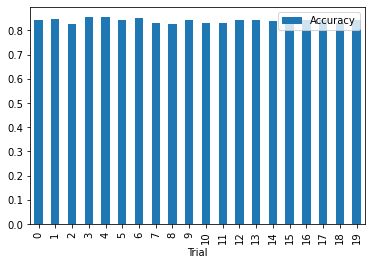

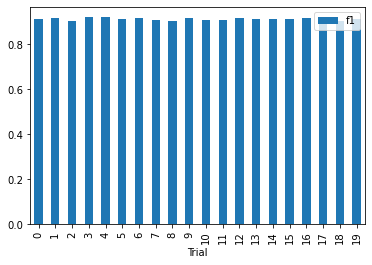

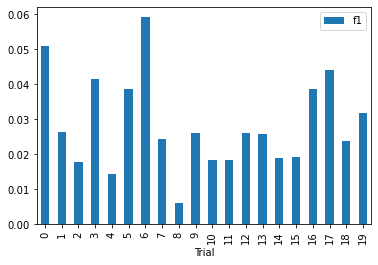

***   f1 average for finding people who pay in full:             0.9128
***   f1 average for finding people who will not pay in full:    0.0285
***   Accuracy average for finding if loan will be paid or not:  0.84


In [38]:
accFrame = pd.DataFrame({'Trial': range(20), "Accuracy": accuracyValues})
accFrame.plot.bar(x='Trial',y='Accuracy')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1": f1a})
accFrame.plot.bar(x='Trial',y='f1')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1": f1b})
accFrame.plot.bar(x='Trial',y='f1')
plt.show()

from statistics import mean
print("***   f1 average for finding people who pay in full:            ", mean(f1a).round(4))
print("***   f1 average for finding people who will not pay in full:   ", mean(f1b).round(4))
print("***   Accuracy average for finding if loan will be paid or not: ", mean(accuracyValues).round(4))

##  Let's note how the values for target = 1 f1-score oscilate. Not a good sign. The f1-score for target = 0 and accuracy have remained consistent during out 20 fold cross validation, however, for the target = 1, the models varies a lot, as shown in plot, and it seems like this is not the best model to analyze this data set, so let's move on to others. This concludes the first model, using a Logistic Regression to determine if a loan will be paid or not. With the resulting average accuracy of 0.84 and f1-score average pair [0.9128, 0.0285], this model seems to be a good predictor for target = 0, but an unreliable model for our study case of target = 1.

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />


## Next, I am to decide what other model I will use for exporing the data from another angle. This data set seems like a good candidate for a decision tree, but before that I will try a few support vector machine models. 

In [39]:
#Lets check the data is intact from previous Logistic Regresion
df.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  credit_card  debt_consolidation  educational  \
0        0               0            0                   1            0   
1        0               0            1                   0            0   
2        0               0            0                   1            0   
3        0               0            0                   1            0   
4        0               0            1                   0            0   

   home_improvement  major_purchase  small_business  
0                 0               0               0  
1                 0               0               0  
2                 0               0               0  
3                 0               0               0  
4                 0               0               0

In [40]:
# All data rows and columns are there, judging by the shape.
print("Shape of frame", df.shape)

Shape of frame (9562, 19)


## As done with homework #3, I will try different kernels, C variables and Gamma values on different sets os parameters. 
* The first uses all the columns as features.
* The second uses the top 6 correlations.

## Let's first run the SVM with all columns as features

In [41]:
# Let me make a copy
copy_df = df.copy(deep=True)
copy_df.head()


credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  credit_card  debt_consolidation  educational  \
0        0               0            0                   1            0   
1        0               0            1                   0            0   
2        0               0            0                   1            0   
3        0               0            0                   1            0   
4        0               0            1                   0            0   

   home_improvement  major_purchase  small_business  
0                 0               0               0  
1                 0               0               0  
2                 0               0               0  
3                 0               0               0  
4                 0               0               0

In [42]:
copy_df.shape #all rows and cols are here

(9562, 19)

In [43]:
kernel = ['linear', 'rbf']
c = [2**-6, 2**5, 2**6]
gamma = [2**-6, 1, 2]

In [44]:
''' #Remove triple quote here and below to run - caution, it will take hours. Result is pasted below.
for i in range (0, len(kernel)):
    for j in range (0, len(c)):
        for k in range(0, len(gamma)):
            X_train, X_test, Y_train, Y_test = train_test_split(df.drop('not.fully.paid', axis=1),
                                                                 df['not.fully.paid'], 
                                                                 test_size=0.2, random_state=101)
            if kernel[i] == 'linear':
                model = svm.SVC(kernel='linear', C= c[j])
                print("   *** Running linear kernel with C = ", c[j], " ***  ")
            else:
                model = svm.SVC(kernel='rbf', C = c[j], gamma = gamma[k])
                print("   ******** Running rbf kernel with C = {} and gamma = {}".format(c[j], gamma[k]), " ********  ")
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)
            print("Accuracy for this SVM model: ", accuracy_score(Y_test,Y_pred))
            print("Classification report for this model:\n", classification_report(Y_test,Y_pred), "\n\n")    
''' # Remove triple quote here and above to run - caution, t will take hours. Result is pasted below.

' #Remove triple quote here and below to run - caution, it will take hours. Result is pasted below.\nfor i in range (0, len(kernel)):\n    for j in range (0, len(c)):\n        for k in range(0, len(gamma)):\n            X_train, X_test, Y_train, Y_test = train_test_split(df.drop(\'not.fully.paid\', axis=1),\n                                                                 df[\'not.fully.paid\'], \n                                                                 test_size=0.2, random_state=101)\n            if kernel[i] == \'linear\':\n                model = svm.SVC(kernel=\'linear\', C= c[j])\n                print("   *** Running linear kernel with C = ", c[j], " ***  ")\n            else:\n                model = svm.SVC(kernel=\'rbf\', C = c[j], gamma = gamma[k])\n                print("   ******** Running rbf kernel with C = {} and gamma = {}".format(c[j], gamma[k]), " ********  ")\n            model.fit(X_train, Y_train)\n            Y_pred = model.predict(X_test)\n            pr

## The computation above proved to be too much for my computer to handle in a timely manner. (Intel i7, 2.6 GHz, 16GB RAM). I will let it run overnight and hope it will be done by the time I come back from work. If so, will not run this cell anymore!


## My computer was running for several hours in order to accomplish the SVM using all columns as features. I also realize that due to the way I setup the loops, some values ran more than one time, which was wasteful. The same happened for the RBF kernel and due to the time consuming nature of running them, I won't remove or re run - unless I find a mistake later on. Ultimately, it serves to prove that we get the same value by analyzing the same data, a preamble to cross validation to happen later. 

## The best result for f1-score using SVM with all columns as features for target = 1 is at least twice as good as using Logistic Regression and yet, very low, going from 0.03 to 0.08 for the higher C variables - which indicate tighter margins an less errors, hence the greater 0.08 value.

## Due to time consuming nature of the process, I am pasting below the results so I do not have to run the cell above anymore.

<pre>
<b> Copy and Paste of reports for SVM using all columns as features</b>
<br>
*** Running linear kernel with C =  0.015625  ***  
Accuracy for this SVM model:  0.8374281233664401
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1623
           1       0.18      0.02      0.04       290

    accuracy                           0.84      1913
   macro avg       0.52      0.50      0.47      1913
weighted avg       0.75      0.84      0.78      1913
 


   *** Running linear kernel with C =  0.015625  ***  
Accuracy for this SVM model:  0.8374281233664401
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1623
           1       0.18      0.02      0.04       290

    accuracy                           0.84      1913
   macro avg       0.52      0.50      0.47      1913
weighted avg       0.75      0.84      0.78      1913
 


   *** Running linear kernel with C =  0.015625  ***  
Accuracy for this SVM model:  0.8374281233664401
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1623
           1       0.18      0.02      0.04       290

    accuracy                           0.84      1913
   macro avg       0.52      0.50      0.47      1913
weighted avg       0.75      0.84      0.78      1913
 


   *** Running linear kernel with C =  32  ***  
Accuracy for this SVM model:  0.836382645060115
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1623
           1       0.27      0.04      0.08       290

    accuracy                           0.84      1913
   macro avg       0.56      0.51      0.49      1913
weighted avg       0.76      0.84      0.78      1913
 


   *** Running linear kernel with C =  32  ***  
Accuracy for this SVM model:  0.836382645060115
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1623
           1       0.27      0.04      0.08       290

    accuracy                           0.84      1913
   macro avg       0.56      0.51      0.49      1913
weighted avg       0.76      0.84      0.78      1913
 


   *** Running linear kernel with C =  32  ***  
Accuracy for this SVM model:  0.836382645060115
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1623
           1       0.27      0.04      0.08       290

    accuracy                           0.84      1913
   macro avg       0.56      0.51      0.49      1913
weighted avg       0.76      0.84      0.78      1913
 


   *** Running linear kernel with C =  64  ***  
Accuracy for this SVM model:  0.8384736016727653
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1623
           1       0.28      0.04      0.07       290

    accuracy                           0.84      1913
   macro avg       0.57      0.51      0.49      1913
weighted avg       0.76      0.84      0.78      1913
 


   *** Running linear kernel with C =  64  ***  
Accuracy for this SVM model:  0.8384736016727653
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1623
           1       0.28      0.04      0.07       290

    accuracy                           0.84      1913
   macro avg       0.57      0.51      0.49      1913
weighted avg       0.76      0.84      0.78      1913
 


   *** Running linear kernel with C =  64  ***  
Accuracy for this SVM model:  0.8384736016727653
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1623
           1       0.28      0.04      0.07       290

    accuracy                           0.84      1913
   macro avg       0.57      0.51      0.49      1913
weighted avg       0.76      0.84      0.78      1913
 


   ******** Running rbf kernel with C = 0.015625 and gamma = 0.015625  ********  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   ******** Running rbf kernel with C = 0.015625 and gamma = 1  ********  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   ******** Running rbf kernel with C = 0.015625 and gamma = 2  ********  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   ******** Running rbf kernel with C = 32 and gamma = 0.015625  ********  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   ******** Running rbf kernel with C = 32 and gamma = 1  ********  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   ******** Running rbf kernel with C = 32 and gamma = 2  ********  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   ******** Running rbf kernel with C = 64 and gamma = 0.015625  ********  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   ******** Running rbf kernel with C = 64 and gamma = 1  ********  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   ******** Running rbf kernel with C = 64 and gamma = 2  ********  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
</pre>

## Using SVM and all columns as features has produced a better result than the cross validated Logistic Regression f1-score of [0.09128, 0.0285] with C = 32. Before jumping to conclusions, let's run the SVM also with the top six correlations and hope it will be better and faster. 

## Let's run the SVM with top 6 correlations to target variable 'not.fully.paid'

In [45]:
df_top_six= df[['credit.policy','int.rate','fico','inq.last.6mths','revol.util','small_business', 'not.fully.paid']]

In [46]:
''' #Remove triple quote here and below to run - caution, it can take hours. Result is pasted below.
for i in range (0, len(kernel)):
    for j in range (0, len(c)):
        for k in range(0, len(gamma)):
            X_train, X_test, Y_train, Y_test = train_test_split(df_top_six.drop('not.fully.paid', axis=1),
                                                                 df_top_six['not.fully.paid'], 
                                                                 test_size = 0.2, random_state=101)
            if kernel[i] == 'linear':
                model = svm.SVC(kernel='linear', C= c[j])
                print("   *** Running linear kernel with C = ", c[j], " ***  ")
            else:
                model = svm.SVC(kernel='rbf', C = c[j], gamma = gamma[k])
                print("   ******** Running rbf kernel with C = {} and gamma = {}".format(c[j], gamma[k]), " ********  ")
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)
            print("Accuracy for this SVM model: ", accuracy_score(Y_test,Y_pred))
            print("Classification report for this model:\n", classification_report(Y_test,Y_pred), "\n\n")
''' #Remove triple quote here and below to run - caution, it can take hours. Result is pasted below.

' #Remove triple quote here and below to run - caution, it can take hours. Result is pasted below.\nfor i in range (0, len(kernel)):\n    for j in range (0, len(c)):\n        for k in range(0, len(gamma)):\n            X_train, X_test, Y_train, Y_test = train_test_split(df_top_six.drop(\'not.fully.paid\', axis=1),\n                                                                 df_top_six[\'not.fully.paid\'], \n                                                                 test_size = 0.2, random_state=101)\n            if kernel[i] == \'linear\':\n                model = svm.SVC(kernel=\'linear\', C= c[j])\n                print("   *** Running linear kernel with C = ", c[j], " ***  ")\n            else:\n                model = svm.SVC(kernel=\'rbf\', C = c[j], gamma = gamma[k])\n                print("   ******** Running rbf kernel with C = {} and gamma = {}".format(c[j], gamma[k]), " ********  ")\n            model.fit(X_train, Y_train)\n            Y_pred = model.predict(X_test

## The output displayed above for six features was not quite as time consuming, but decided to copy and paste the results below and avoid running the cell again.

<pre>
<b>Copy and Paste of results for SVM using top six correlations to target variable</b>
<br>
*** Running linear kernel with C =  0.015625  ***  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   *** Running linear kernel with C =  0.015625  ***  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   *** Running linear kernel with C =  0.015625  ***  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   *** Running linear kernel with C =  32  ***  
Accuracy for this SVM model:  0.8316779926816519
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      1623
           1       0.36      0.14      0.21       290

    accuracy                           0.83      1913
   macro avg       0.61      0.55      0.56      1913
weighted avg       0.79      0.83      0.80      1913
 


   *** Running linear kernel with C =  32  ***  
Accuracy for this SVM model:  0.8316779926816519
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      1623
           1       0.36      0.14      0.21       290

    accuracy                           0.83      1913
   macro avg       0.61      0.55      0.56      1913
weighted avg       0.79      0.83      0.80      1913
 


   *** Running linear kernel with C =  32  ***  
Accuracy for this SVM model:  0.8316779926816519
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      1623
           1       0.36      0.14      0.21       290

    accuracy                           0.83      1913
   macro avg       0.61      0.55      0.56      1913
weighted avg       0.79      0.83      0.80      1913
 


   *** Running linear kernel with C =  64  ***  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      1623
           1       0.50      0.06      0.10       290

    accuracy                           0.85      1913
   macro avg       0.68      0.52      0.51      1913
weighted avg       0.80      0.85      0.79      1913
 


   *** Running linear kernel with C =  64  ***  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      1623
           1       0.50      0.06      0.10       290

    accuracy                           0.85      1913
   macro avg       0.68      0.52      0.51      1913
weighted avg       0.80      0.85      0.79      1913
 


   *** Running linear kernel with C =  64  ***  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      1623
           1       0.50      0.06      0.10       290

    accuracy                           0.85      1913
   macro avg       0.68      0.52      0.51      1913
weighted avg       0.80      0.85      0.79      1913
 


   ******** Running rbf kernel with C = 0.015625 and gamma = 0.015625  ********  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   ******** Running rbf kernel with C = 0.015625 and gamma = 1  ********  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   ******** Running rbf kernel with C = 0.015625 and gamma = 2  ********  
Accuracy for this SVM model:  0.8484056455828541
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913
 


   ******** Running rbf kernel with C = 32 and gamma = 0.015625  ********  
Accuracy for this SVM model:  0.8457919498170413
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1623
           1       0.45      0.09      0.14       290

    accuracy                           0.85      1913
   macro avg       0.66      0.53      0.53      1913
weighted avg       0.80      0.85      0.80      1913
 


   ******** Running rbf kernel with C = 32 and gamma = 1  ********  
Accuracy for this SVM model:  0.7867224255096706
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1623
           1       0.12      0.06      0.08       290

    accuracy                           0.79      1913
   macro avg       0.48      0.49      0.48      1913
weighted avg       0.73      0.79      0.76      1913
 


   ******** Running rbf kernel with C = 32 and gamma = 2  ********  
Accuracy for this SVM model:  0.8008363826450601
Classification report for this model:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      1623
           1       0.09      0.03      0.05       290

    accuracy                           0.80      1913
   macro avg       0.47      0.49      0.47      1913
weighted avg       0.73      0.80      0.76      1913
 


   ******** Running rbf kernel with C = 64 and gamma = 0.015625  ********  
Accuracy for this SVM model:  0.8332462101411395
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1623
           1       0.32      0.09      0.14       290

    accuracy                           0.83      1913
   macro avg       0.59      0.53      0.52      1913
weighted avg       0.77      0.83      0.79      1913
 


   ******** Running rbf kernel with C = 64 and gamma = 1  ********  
Accuracy for this SVM model:  0.785154208050183
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1623
           1       0.12      0.07      0.08       290

    accuracy                           0.79      1913
   macro avg       0.48      0.49      0.48      1913
weighted avg       0.74      0.79      0.76      1913
 


   ******** Running rbf kernel with C = 64 and gamma = 2  ********  
Accuracy for this SVM model:  0.7982226868792472
Classification report for this model:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89      1623
           1       0.09      0.04      0.05       290

    accuracy                           0.80      1913
   macro avg       0.47      0.49      0.47      1913
weighted avg       0.73      0.80      0.76      1913

</pre>

## From the two choices of features for the SVM so far, using the version with only the top six correlations has resulted in a better result for linear kernel with C = 32 with f1 = [0.91,0.21]. For C = 64, the f1 was [0.92, 0.10] while for C = 2**-6 the f1 score was [0.92, 0.00]. Now, I wonder what are the results just before and after C = 32, let's say C = 28 and 36, maybe even more than that range. Can I find a better C value than 32 for the linear kernel? Let's see!


In [47]:
''' # Can take a while, see pasted results below. Remove triple quote to run
c = [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
for j in range (0, len(c)):
    X_train, X_test, Y_train, Y_test = train_test_split(df_top_six.drop('not.fully.paid', axis=1),
                                                             df_top_six['not.fully.paid'], 
                                                             test_size = 0.2, random_state=101)
    print("   *** Running linear kernel with C = ", c[j], " ***  ")
    model = svm.SVC(kernel='linear', C= c[j])
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print("Accuracy for this SVM model: ", accuracy_score(Y_test,Y_pred))
    print("Classification report for this model:\n", classification_report(Y_test,Y_pred), "\n\n")  
''' # Can take a while, see pasted results below. Remove triple quote to run

' # Can take a while, see pasted results below. Remove triple quote to run\nc = [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]\nfor j in range (0, len(c)):\n    X_train, X_test, Y_train, Y_test = train_test_split(df_top_six.drop(\'not.fully.paid\', axis=1),\n                                                             df_top_six[\'not.fully.paid\'], \n                                                             test_size = 0.2, random_state=101)\n    print("   *** Running linear kernel with C = ", c[j], " ***  ")\n    model = svm.SVC(kernel=\'linear\', C= c[j])\n    model.fit(X_train, Y_train)\n    Y_pred = model.predict(X_test)\n    print("Accuracy for this SVM model: ", accuracy_score(Y_test,Y_pred))\n    print("Classification report for this model:\n", classification_report(Y_test,Y_pred), "\n\n")  \n'

<pre>
<b>Copy and paste of the results above</b><br>
 *** Running linear kernel with C =  24  ***  
Accuracy for this SVM model:  0.8489283847360167
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1623
           1       0.51      0.07      0.12       290

    accuracy                           0.85      1913
   macro avg       0.68      0.53      0.52      1913
weighted avg       0.80      0.85      0.80      1913
 


   *** Running linear kernel with C =  25  ***  
Accuracy for this SVM model:  0.8447464715107161
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      1623
           1       0.45      0.10      0.17       290

    accuracy                           0.84      1913
   macro avg       0.65      0.54      0.54      1913
weighted avg       0.80      0.84      0.80      1913
 


   *** Running linear kernel with C =  26  ***  
Accuracy for this SVM model:  0.8447464715107161
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      1623
           1       0.45      0.10      0.17       290

    accuracy                           0.84      1913
   macro avg       0.65      0.54      0.54      1913
weighted avg       0.80      0.84      0.80      1913
 


   *** Running linear kernel with C =  27  ***  
Accuracy for this SVM model:  0.8489283847360167
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1623
           1       0.51      0.07      0.12       290

    accuracy                           0.85      1913
   macro avg       0.68      0.53      0.52      1913
weighted avg       0.80      0.85      0.80      1913
 


   *** Running linear kernel with C =  28  ***  
Accuracy for this SVM model:  0.8489283847360167
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1623
           1       0.51      0.07      0.12       290

    accuracy                           0.85      1913
   macro avg       0.68      0.53      0.52      1913
weighted avg       0.80      0.85      0.80      1913
 


   *** Running linear kernel with C =  29  ***  
Accuracy for this SVM model:  0.8389963408259279
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1623
           1       0.40      0.12      0.19       290

    accuracy                           0.84      1913
   macro avg       0.63      0.54      0.55      1913
weighted avg       0.79      0.84      0.80      1913
 


   *** Running linear kernel with C =  30  ***  
Accuracy for this SVM model:  0.8452692106638787
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1623
           1       0.44      0.08      0.13       290

    accuracy                           0.85      1913
   macro avg       0.65      0.53      0.52      1913
weighted avg       0.79      0.85      0.80      1913
 


   *** Running linear kernel with C =  31  ***  
Accuracy for this SVM model:  0.8389963408259279
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1623
           1       0.40      0.12      0.19       290

    accuracy                           0.84      1913
   macro avg       0.63      0.54      0.55      1913
weighted avg       0.79      0.84      0.80      1913
 


   *** Running linear kernel with C =  32  ***  
Accuracy for this SVM model:  0.8316779926816519
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      1623
           1       0.36      0.14      0.21       290

    accuracy                           0.83      1913
   macro avg       0.61      0.55      0.56      1913
weighted avg       0.79      0.83      0.80      1913
 


   *** Running linear kernel with C =  33  ***  
Accuracy for this SVM model:  0.8452692106638787
Classification report for this model:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      1623
           1       0.41      0.05      0.09       290

    accuracy                           0.85      1913
   macro avg       0.63      0.52      0.50      1913
weighted avg       0.79      0.85      0.79      1913
 


   *** Running linear kernel with C =  34  ***  
Accuracy for this SVM model:  0.8463146889702039
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1623
           1       0.45      0.07      0.11       290

    accuracy                           0.85      1913
   macro avg       0.65      0.53      0.52      1913
weighted avg       0.79      0.85      0.79      1913
 


   *** Running linear kernel with C =  35  ***  
Accuracy for this SVM model:  0.8395190799790905
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1623
           1       0.40      0.12      0.19       290

    accuracy                           0.84      1913
   macro avg       0.63      0.54      0.55      1913
weighted avg       0.79      0.84      0.80      1913
 


   *** Running linear kernel with C =  36  ***  
Accuracy for this SVM model:  0.8447464715107161
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      1623
           1       0.43      0.08      0.13       290

    accuracy                           0.84      1913
   macro avg       0.65      0.53      0.52      1913
weighted avg       0.79      0.84      0.80      1913
 


   *** Running linear kernel with C =  37  ***  
Accuracy for this SVM model:  0.8489283847360167
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1623
           1       0.51      0.07      0.12       290

    accuracy                           0.85      1913
   macro avg       0.68      0.53      0.52      1913
weighted avg       0.80      0.85      0.80      1913
 


   *** Running linear kernel with C =  38  ***  
Accuracy for this SVM model:  0.8494511238891793
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1623
           1       0.53      0.07      0.12       290

    accuracy                           0.85      1913
   macro avg       0.69      0.53      0.52      1913
weighted avg       0.81      0.85      0.80      1913
 


   *** Running linear kernel with C =  39  ***  
Accuracy for this SVM model:  0.8395190799790905
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1623
           1       0.40      0.12      0.19       290

    accuracy                           0.84      1913
   macro avg       0.63      0.54      0.55      1913
weighted avg       0.79      0.84      0.80      1913
 


   *** Running linear kernel with C =  40  ***  
Accuracy for this SVM model:  0.8489283847360167
Classification report for this model:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1623
           1       0.51      0.07      0.12       290

    accuracy                           0.85      1913
   macro avg       0.68      0.53      0.52      1913
weighted avg       0.80      0.85      0.80      1913
 


</pre>

## So the results show that C = 32 is the best parameter from the range 24 to 40. For the SVM, I will then cross validate with the top six columns as features using the linear kernel with C parameter = 32. In the exploration above, this set of parameter and features has yielded the best f1 score so far [0.91, 0.21]

In [47]:
accuracyValues = []
f1a = []
f1b = []
for i in range(20):
    X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df_top_six.drop('not.fully.paid',axis=1), 
                                                    df_top_six['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=random.randint(1,1000))
    model3 = svm.SVC(kernel='linear', C = 32)
    model3.fit(X_train3, Y_train3)
    Y_pred3 = model3.predict(X_test3)
    report3  = classification_report(Y_test3, Y_pred3)
    acc = accuracy_score(Y_test3, Y_pred3)
    accuracyValues.append(acc)
    rep = precision_recall_fscore_support(Y_test3, Y_pred3, average = None)
    f1a.append(rep[2][0])
    f1b.append(rep[2][1])
    print('Trial {}:\t Accuracy Score: {}\t f1-score: {} '.format(i, acc.round(3), rep[2]))

Trial 0:	 Accuracy Score: 0.857	 f1-score: [0.9223796  0.07432432] 
Trial 1:	 Accuracy Score: 0.837	 f1-score: [0.91081159 0.08259587] 
Trial 2:	 Accuracy Score: 0.811	 f1-score: [0.89265537 0.22030238] 
Trial 3:	 Accuracy Score: 0.8	 f1-score: [0.88522625 0.21676892] 
Trial 4:	 Accuracy Score: 0.835	 f1-score: [0.90877598 0.12707182] 
Trial 5:	 Accuracy Score: 0.854	 f1-score: [0.92080613 0.07920792] 
Trial 6:	 Accuracy Score: 0.832	 f1-score: [0.90688259 0.125     ] 
Trial 7:	 Accuracy Score: 0.835	 f1-score: [0.9091954 0.0867052] 
Trial 8:	 Accuracy Score: 0.846	 f1-score: [0.91575931 0.125     ] 
Trial 9:	 Accuracy Score: 0.818	 f1-score: [0.8989547  0.08900524] 
Trial 10:	 Accuracy Score: 0.842	 f1-score: [0.91291811 0.15642458] 
Trial 11:	 Accuracy Score: 0.827	 f1-score: [0.90414133 0.11260054] 
Trial 12:	 Accuracy Score: 0.828	 f1-score: [0.90521464 0.07323944] 
Trial 13:	 Accuracy Score: 0.826	 f1-score: [0.9038406  0.08264463] 
Trial 14:	 Accuracy Score: 0.846	 f1-score: [0.9

## Let's visualize the results for this 20 fold cross validation

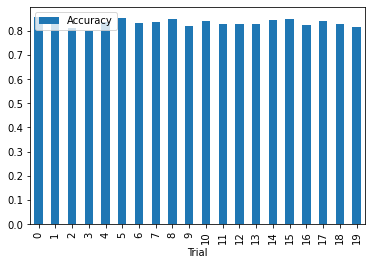

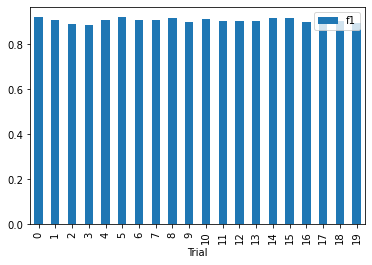

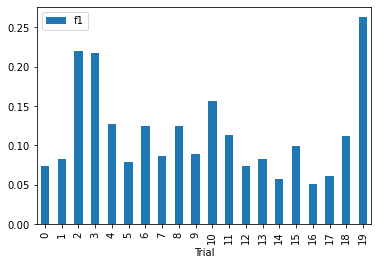

***   f1 average for finding people who pay in full:             0.9072
***   f1 average for finding people who will not pay in full:    0.1147
***   Accuracy average for finding if loan will be paid or not:  0.8323


In [48]:
accFrame = pd.DataFrame({'Trial': range(20), "Accuracy": accuracyValues})
accFrame.plot.bar(x='Trial',y='Accuracy')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1": f1a})
accFrame.plot.bar(x='Trial',y='f1')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1": f1b})
accFrame.plot.bar(x='Trial',y='f1')
plt.show()

print("***   f1 average for finding people who pay in full:            ", mean(f1a).round(4))
print("***   f1 average for finding people who will not pay in full:   ", mean(f1b).round(4))
print("***   Accuracy average for finding if loan will be paid or not: ", mean(accuracyValues).round(4))

## Very important to note that the plot shows that the results for f1-score for target variable = 1 vary a lot for each random data set in validation. This leads me to think the models so far are not reliable and that hopefully, again, the next models will give us better results.

## When comparing the average f1-score from the cross validated Logistic Regression of [0.9128, 0.0285], the cross validated SVM offered a better f1-result pair [0.9072, 0.1147]. Also, the data shows that the initial data used for C = 32 in linear kernel was by chance a good set, yielding a value of [0.91, 0.21] for the f1-score. This leads me to my final attempt at finding a better f1-score with SVM. I want to cross validate a couple of C parameters, one below 32 and one over 32 that produced the second highest f1-score for the linear SVM kernel with C = 29 and C = 39.

In [48]:
''' # It Will take a while to run, see results below. Remove triple quote to run
c = [29, 39]
for v in range(0, len(c)):
    print("\n*****  Running cross validation for SVM linear kernel with C = ", c[v],"  *****\n")
    accuracyValues = []
    f1a = []
    f1b = []
    for i in range(20):
        X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df_top_six.drop('not.fully.paid',axis=1), 
                                                        df_top_six['not.fully.paid'], 
                                                        test_size=0.20, 
                                                        random_state=random.randint(1,1000))
        model3 = svm.SVC(kernel='linear', C = c[v])
        model3.fit(X_train3, Y_train3)
        Y_pred3 = model3.predict(X_test3)
        report3  = classification_report(Y_test3, Y_pred3)
        acc = accuracy_score(Y_test3, Y_pred3)
        accuracyValues.append(acc)
        rep = precision_recall_fscore_support(Y_test3, Y_pred3, average = None)
        f1a.append(rep[2][0])
        f1b.append(rep[2][1])
        print('Trial {}:\t Accuracy Score: {}\t f1-score: {} '.format(i, acc.round(3), rep[2]))
    accFrame = pd.DataFrame({'Trial': range(20), "Accuracy": accuracyValues})
    accFrame.plot.bar(x='Trial',y='Accuracy')
    plt.show()

    accFrame = pd.DataFrame({'Trial': range(20), "f1": f1a})
    accFrame.plot.bar(x='Trial',y='f1')
    plt.show()
    
    accFrame = pd.DataFrame({'Trial': range(20), "f1": f1b})
    accFrame.plot.bar(x='Trial',y='f1')
    plt.show()

    print("***   f1 average for finding people who pay in full:            ", mean(f1a).round(4))
    print("***   f1 average for finding people who will not pay in full:   ", mean(f1b).round(4))
    print("***   Accuracy average for finding if loan will be paid or not: ", mean(accuracyValues).round(4))
    
''' # It Will take a while to run, see results below. Remove triple quote to run

' # It Will take a while to run, see results below. Remove triple quote to run\nc = [29, 39]\nfor v in range(0, len(c)):\n    print("\n*****  Running cross validation for SVM linear kernel with C = ", c[v],"  *****\n")\n    accuracyValues = []\n    f1a = []\n    f1b = []\n    for i in range(20):\n        X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df_top_six.drop(\'not.fully.paid\',axis=1), \n                                                        df_top_six[\'not.fully.paid\'], \n                                                        test_size=0.20, \n                                                        random_state=random.randint(1,1000))\n        model3 = svm.SVC(kernel=\'linear\', C = c[v])\n        model3.fit(X_train3, Y_train3)\n        Y_pred3 = model3.predict(X_test3)\n        report3  = classification_report(Y_test3, Y_pred3)\n        acc = accuracy_score(Y_test3, Y_pred3)\n        accuracyValues.append(acc)\n        rep = precision_recall_fscore_support(Y_test

<pre>
<b>Copy and paste of results above </b><br>
*****  Running cross validation for SVM linear kernel with C =  29   *****

Trial 0:	 Accuracy Score: 0.835	 f1-score: [0.90997428 0.03669725] 
Trial 1:	 Accuracy Score: 0.813	 f1-score: [0.89345238 0.23175966] 
Trial 2:	 Accuracy Score: 0.831	 f1-score: [0.90563833 0.19851117] 
Trial 3:	 Accuracy Score: 0.84	 f1-score: [0.91165468 0.12535613] 
Trial 4:	 Accuracy Score: 0.829	 f1-score: [0.90569293 0.05747126] 
Trial 5:	 Accuracy Score: 0.82	 f1-score: [0.89801951 0.22121896] 
Trial 6:	 Accuracy Score: 0.83	 f1-score: [0.90659026 0.0297619 ] 
Trial 7:	 Accuracy Score: 0.844	 f1-score: [0.91459583 0.08      ] 
Trial 8:	 Accuracy Score: 0.819	 f1-score: [0.89862694 0.13895782] 
Trial 9:	 Accuracy Score: 0.832	 f1-score: [0.90794379 0.05309735] 
Trial 10:	 Accuracy Score: 0.83	 f1-score: [0.90642096 0.07932011] 
Trial 11:	 Accuracy Score: 0.829	 f1-score: [0.90584509 0.07365439] 
Trial 12:	 Accuracy Score: 0.832	 f1-score: [0.90773211 0.07492795] 
Trial 13:	 Accuracy Score: 0.846	 f1-score: [0.9166194 0.02     ] 
Trial 14:	 Accuracy Score: 0.839	 f1-score: [0.91067285 0.18518519] 
Trial 15:	 Accuracy Score: 0.832	 f1-score: [0.90752441 0.06395349] 
Trial 16:	 Accuracy Score: 0.836	 f1-score: [0.90945907 0.15176152] 
Trial 17:	 Accuracy Score: 0.83	 f1-score: [0.90674319 0.04692082] 
Trial 18:	 Accuracy Score: 0.847	 f1-score: [0.9167142 0.0875   ] 
Trial 19:	 Accuracy Score: 0.809	 f1-score: [0.89229861 0.16475973] 


***   f1 average for finding people who pay in full:             0.9066
***   f1 average for finding people who will not pay in full:    0.106
***   Accuracy average for finding if loan will be paid or not:  0.8311

*****  Running cross validation for SVM linear kernel with C =  39   *****

Trial 0:	 Accuracy Score: 0.835	 f1-score: [0.90787172 0.2020202 ] 
Trial 1:	 Accuracy Score: 0.825	 f1-score: [0.90239626 0.17326733] 
Trial 2:	 Accuracy Score: 0.835	 f1-score: [0.9088812  0.11731844] 
Trial 3:	 Accuracy Score: 0.84	 f1-score: [0.91222031 0.1       ] 
Trial 4:	 Accuracy Score: 0.815	 f1-score: [0.896268   0.16548463] 
Trial 5:	 Accuracy Score: 0.824	 f1-score: [0.9020979  0.14720812] 
Trial 6:	 Accuracy Score: 0.847	 f1-score: [0.9165955  0.06389776] 
Trial 7:	 Accuracy Score: 0.85	 f1-score: [0.91862773 0.04013378] 
Trial 8:	 Accuracy Score: 0.843	 f1-score: [0.9144324 0.0625   ] 
Trial 9:	 Accuracy Score: 0.836	 f1-score: [0.90982426 0.11830986] 
Trial 10:	 Accuracy Score: 0.806	 f1-score: [0.88868887 0.2474645 ] 
Trial 11:	 Accuracy Score: 0.839	 f1-score: [0.91144336 0.11494253] 
Trial 12:	 Accuracy Score: 0.844	 f1-score: [0.91485714 0.08588957] 
Trial 13:	 Accuracy Score: 0.836	 f1-score: [0.91018651 0.08211144] 
Trial 14:	 Accuracy Score: 0.838	 f1-score: [0.91142857 0.04907975] 
Trial 15:	 Accuracy Score: 0.816	 f1-score: [0.89542484 0.23478261] 
Trial 16:	 Accuracy Score: 0.836	 f1-score: [0.90977011 0.09248555] 
Trial 17:	 Accuracy Score: 0.837	 f1-score: [0.91055508 0.10888252] 
Trial 18:	 Accuracy Score: 0.846	 f1-score: [0.91554538 0.11411411] 
Trial 19:	 Accuracy Score: 0.852	 f1-score: [0.91931818 0.07189542] 


***   f1 average for finding people who pay in full:             0.9088
***   f1 average for finding people who will not pay in full:    0.1196
***   Accuracy average for finding if loan will be paid or not:  0.8351
    
</pre>

## I am glad that I cross validated the other C parameters as SVM model run with a linear kernel with C = 39 and producing a cross validated f1-score pair average of [0.9088, 0.1196]. The SVM also produced a better result than the cross validated Logistic Regression model, which produced a f1-score average pair of [0.9128, 0.0285]. Hence, so far, the best cross validated average for our f1-score for target = 1 is 0.1196 so far with a SVM linear kernel with C = 39.
    

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## For the last model, already mentioned previously in this document, I want to try decision trees with various paramenters, then cross validate the best result. I will proceed with using the top 6 correlations as features to start. Let's get started.

In [49]:
df_top_six.head()

credit.policy  int.rate  fico  inq.last.6mths  revol.util  small_business  \
0              1    0.1189   737               0        52.1               0   
1              1    0.1071   707               0        76.7               0   
2              1    0.1357   682               1        25.6               0   
3              1    0.1008   712               1        73.2               0   
4              1    0.1426   667               0        39.5               0   

   not.fully.paid  
0               0  
1               0  
2               0  
3               0  
4               0

In [50]:
depths = [2, 3, 4, 5, 6]
criterion = ["gini", "entropy"]
for i in range (0, len(depths)):
    for j in range(0, len(criterion)):
        print("\n*********  Running Decision Tree with depth = ", depths[i], " and criterion = ", criterion[j], "*********\n")
        model = DecisionTreeClassifier(max_depth = depths[i], criterion = criterion[j])
        
        X_train, X_test, Y_train, Y_test = train_test_split(df_top_six.drop('not.fully.paid',axis=1), 
                                                        df_top_six['not.fully.paid'],
                                                        test_size=0.2, random_state=101)
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        print("Confusion Matrix for Decision Tree:\n", confusion_matrix(Y_test,predictions))
        print("\nAccuracy Score for Decision Tree: ", accuracy_score(Y_test, predictions))
        print("\nClassification Report for Decision Tree:\n", classification_report(Y_test,predictions))


*********  Running Decision Tree with depth =  2  and criterion =  gini *********

Confusion Matrix for Decision Tree:
 [[1623    0]
 [ 290    0]]

Accuracy Score for Decision Tree:  0.8484056455828541

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913


*********  Running Decision Tree with depth =  2  and criterion =  entropy *********

Confusion Matrix for Decision Tree:
 [[1623    0]
 [ 290    0]]

Accuracy Score for Decision Tree:  0.8484056455828541

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy  

## This is a bit disappointing as I had a feeling that the decision tree was going to yield a better f1-score pair. As you may have read in my homework #3, my guesses were all wrong,so I am not completely surprised anymore. Let me try to run the model with all the columns as features. 

## I also added some depths after 18 just as a test. Below you see my comments for the initial best value: 18. I later comment on higher depths.

In [51]:
depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 30, 40, 50]
criterion = ["gini", "entropy"]
for i in range (0, len(depths)):
    for j in range(0, len(criterion)):
        print("\n*********  Running Decision Tree with depth = ", depths[i], " and criterion = ", criterion[j], "*********\n")
        model = DecisionTreeClassifier(max_depth = depths[i], criterion = criterion[j])
        
        X_train, X_test, Y_train, Y_test = train_test_split(df.drop('not.fully.paid',axis=1), 
                                                        df['not.fully.paid'],
                                                        test_size=0.2, random_state=101)
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        print("Confusion Matrix for Decision Tree:\n", confusion_matrix(Y_test,predictions))
        print("\nAccuracy Score for Decision Tree: ", accuracy_score(Y_test, predictions))
        print("\nClassification Report for Decision Tree:\n", classification_report(Y_test,predictions))


*********  Running Decision Tree with depth =  2  and criterion =  gini *********

Confusion Matrix for Decision Tree:
 [[1623    0]
 [ 290    0]]

Accuracy Score for Decision Tree:  0.8484056455828541

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy                           0.85      1913
   macro avg       0.42      0.50      0.46      1913
weighted avg       0.72      0.85      0.78      1913


*********  Running Decision Tree with depth =  2  and criterion =  entropy *********

Confusion Matrix for Decision Tree:
 [[1623    0]
 [ 290    0]]

Accuracy Score for Decision Tree:  0.8484056455828541

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.00      0.00      0.00       290

    accuracy  

*********  Running Decision Tree with depth =  10  and criterion =  entropy *********

Confusion Matrix for Decision Tree:
 [[1557   66]
 [ 260   30]]

Accuracy Score for Decision Tree:  0.8295870360690015

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1623
           1       0.31      0.10      0.16       290

    accuracy                           0.83      1913
   macro avg       0.58      0.53      0.53      1913
weighted avg       0.77      0.83      0.79      1913


*********  Running Decision Tree with depth =  11  and criterion =  gini *********

Confusion Matrix for Decision Tree:
 [[1528   95]
 [ 257   33]]

Accuracy Score for Decision Tree:  0.8159958180867747

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1623
           1       0.26      0.11      0.16       290

    accuracy 

Confusion Matrix for Decision Tree:
 [[1423  200]
 [ 221   69]]

Accuracy Score for Decision Tree:  0.7799268165185572

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1623
           1       0.26      0.24      0.25       290

    accuracy                           0.78      1913
   macro avg       0.56      0.56      0.56      1913
weighted avg       0.77      0.78      0.78      1913


*********  Running Decision Tree with depth =  18  and criterion =  entropy *********

Confusion Matrix for Decision Tree:
 [[1437  186]
 [ 228   62]]

Accuracy Score for Decision Tree:  0.7835859905906952

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1623
           1       0.25      0.21      0.23       290

    accuracy                           0.78      1913
   macro avg       0.56      0.55      0.55

## So using all features and increasing the depth for the tree to incorporate more features into the decision has returned slightly better f1-score average pair. For the Decision Tree with depth = 18  and criterion =  gini, the f1-score pair is [0.87, 0.25]. I want to proceed for the cross validation and see if the averages are also better than SVM's f1-score pair [0.9088, 0.1196]  

## Let's setup the 20 fold cross validation for the decision tree using all features

Trial 0:	 Accuracy Score: 0.763	 f1-score: [0.86141636 0.17454545] 
Trial 1:	 Accuracy Score: 0.774	 f1-score: [0.86813187 0.21454545] 
Trial 2:	 Accuracy Score: 0.755	 f1-score: [0.85511276 0.20373514] 
Trial 3:	 Accuracy Score: 0.763	 f1-score: [0.86014202 0.22827939] 
Trial 4:	 Accuracy Score: 0.775	 f1-score: [0.86834048 0.23214286] 
Trial 5:	 Accuracy Score: 0.783	 f1-score: [0.87317073 0.23809524] 
Trial 6:	 Accuracy Score: 0.765	 f1-score: [0.86248086 0.19964349] 
Trial 7:	 Accuracy Score: 0.777	 f1-score: [0.86985675 0.21651376] 
Trial 8:	 Accuracy Score: 0.764	 f1-score: [0.860235   0.23648649] 
Trial 9:	 Accuracy Score: 0.762	 f1-score: [0.85951941 0.2137931 ] 
Trial 10:	 Accuracy Score: 0.759	 f1-score: [0.85784767 0.20926244] 
Trial 11:	 Accuracy Score: 0.771	 f1-score: [0.8659542  0.20326679] 
Trial 12:	 Accuracy Score: 0.78	 f1-score: [0.87254012 0.19502868] 
Trial 13:	 Accuracy Score: 0.763	 f1-score: [0.86022832 0.22564103] 
Trial 14:	 Accuracy Score: 0.777	 f1-score: [

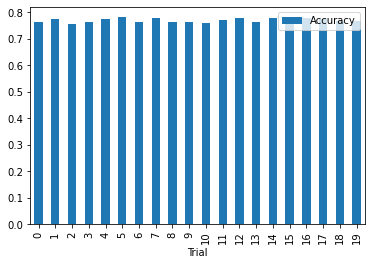

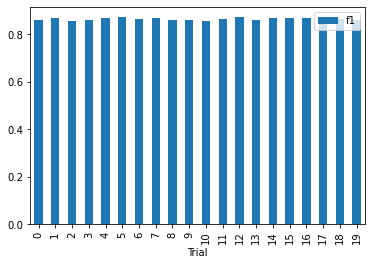

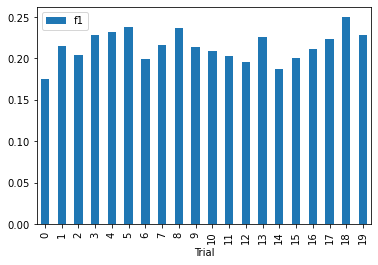

***   f1 average for finding people who pay in full:             0.8649
***   f1 average for finding people who will not pay in full:    0.2145
***   Accuracy average for finding if loan will be paid or not:  0.7696


In [52]:
accuracyValues = []
f1a = []
f1b = []
for i in range(20):
    X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df.drop('not.fully.paid',axis=1), 
                                                    df['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=random.randint(1,1000))
    model3 = DecisionTreeClassifier(max_depth = 18, criterion = 'gini')
    model3.fit(X_train3, Y_train3)
    Y_pred3 = model3.predict(X_test3)
    report3  = classification_report(Y_test3, Y_pred3)
    acc = accuracy_score(Y_test3, Y_pred3)
    accuracyValues.append(acc)
    rep = precision_recall_fscore_support(Y_test3, Y_pred3, average = None)
    f1a.append(rep[2][0])
    f1b.append(rep[2][1])
    print('Trial {}:\t Accuracy Score: {}\t f1-score: {} '.format(i, acc.round(3), rep[2]))
accFrame = pd.DataFrame({'Trial': range(20), "Accuracy": accuracyValues})
accFrame.plot.bar(x='Trial',y='Accuracy')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1": f1a})
accFrame.plot.bar(x='Trial',y='f1')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1": f1b})
accFrame.plot.bar(x='Trial',y='f1')
plt.show()

print("***   f1 average for finding people who pay in full:            ", mean(f1a).round(4))
print("***   f1 average for finding people who will not pay in full:   ", mean(f1b).round(4))
print("***   Accuracy average for finding if loan will be paid or not: ", mean(accuracyValues).round(4))

## So we have the best f1-score average pair so far. Using the max_depth = 18 and criterion = 'gini'  this Decision Tree model produces a cross validated f1-score average pair of [0.8649, 0.2145]. That is so far the highest cross validated average for the f1-score for target variable = 1. Let's note as well that the plot for target = 1 cross validation shows that the values oscilate much less, which resulted in a better average.

## Let's attempt to visualize this tree!

In [53]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import io
import pydot
import pydotplus
import graphviz
from sklearn import tree
features = list(df.drop(['not.fully.paid'],axis=1).columns)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df.drop('not.fully.paid',axis=1), 
                                                    df['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=random.randint(1,1000))
model3 = DecisionTreeClassifier(max_depth = 18, criterion = 'gini')
model3.fit(X_train3, Y_train3)
Y_pred3 = model3.predict(X_test3)
report3  = classification_report(Y_test3, Y_pred3)

dot_data = StringIO() 
export_graphviz(model3, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## What a nice tree!

## As previous mentioned, I  decided to use alsonhigher depths, 40 seemed to a value near 18 for the f1-score of the target variable = 1: 0.25. For curiosity, I want to cross validate that. 

Trial 0:	 Accuracy Score: 0.729	 f1-score: [0.83741368 0.190625  ] 
Trial 1:	 Accuracy Score: 0.744	 f1-score: [0.84723524 0.2176    ] 
Trial 2:	 Accuracy Score: 0.741	 f1-score: [0.84448633 0.23017107] 
Trial 3:	 Accuracy Score: 0.74	 f1-score: [0.8444722  0.20192308] 
Trial 4:	 Accuracy Score: 0.73	 f1-score: [0.83722397 0.21341463] 
Trial 5:	 Accuracy Score: 0.725	 f1-score: [0.83301587 0.22189349] 
Trial 6:	 Accuracy Score: 0.733	 f1-score: [0.83860759 0.23423423] 
Trial 7:	 Accuracy Score: 0.735	 f1-score: [0.84121516 0.19905213] 
Trial 8:	 Accuracy Score: 0.75	 f1-score: [0.84989032 0.24566929] 
Trial 9:	 Accuracy Score: 0.726	 f1-score: [0.83285578 0.23357664] 
Trial 10:	 Accuracy Score: 0.74	 f1-score: [0.84339623 0.22910217] 
Trial 11:	 Accuracy Score: 0.734	 f1-score: [0.83994959 0.2208589 ] 
Trial 12:	 Accuracy Score: 0.731	 f1-score: [0.83779528 0.20890937] 
Trial 13:	 Accuracy Score: 0.722	 f1-score: [0.83254494 0.18931298] 
Trial 14:	 Accuracy Score: 0.742	 f1-score: [0.8

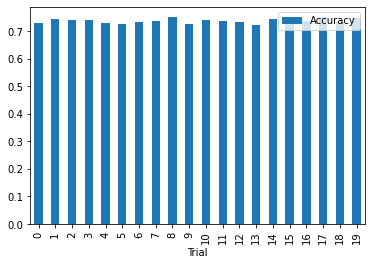

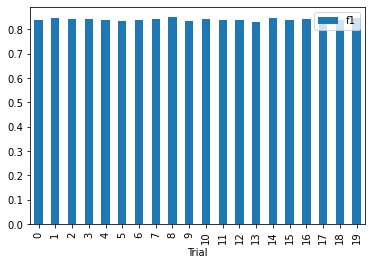

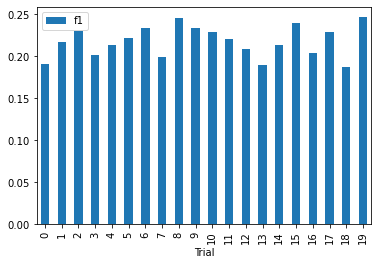

***   f1 average for finding people who pay in full:             0.8412
***   f1 average for finding people who will not pay in full:    0.2178
***   Accuracy average for finding if loan will be paid or not:  0.7361


In [54]:
import random
from sklearn.metrics import precision_recall_fscore_support
from statistics import mean
accuracyValues = []
f1a = []
f1b = []
for i in range(20):
    X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df.drop('not.fully.paid',axis=1), 
                                                    df['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=random.randint(1,1000))
    model3 = DecisionTreeClassifier(max_depth = 40, criterion = 'gini')
    model3.fit(X_train3, Y_train3)
    Y_pred3 = model3.predict(X_test3)
    report3  = classification_report(Y_test3, Y_pred3)
    acc = accuracy_score(Y_test3, Y_pred3)
    accuracyValues.append(acc)
    rep = precision_recall_fscore_support(Y_test3, Y_pred3, average = None)
    f1a.append(rep[2][0])
    f1b.append(rep[2][1])
    print('Trial {}:\t Accuracy Score: {}\t f1-score: {} '.format(i, acc.round(3), rep[2]))
accFrame = pd.DataFrame({'Trial': range(20), "Accuracy": accuracyValues})
accFrame.plot.bar(x='Trial',y='Accuracy')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1": f1a})
accFrame.plot.bar(x='Trial',y='f1')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1": f1b})
accFrame.plot.bar(x='Trial',y='f1')
plt.show()

print("***   f1 average for finding people who pay in full:            ", mean(f1a).round(4))
print("***   f1 average for finding people who will not pay in full:   ", mean(f1b).round(4))
print("***   Accuracy average for finding if loan will be paid or not: ", mean(accuracyValues).round(4))

## And that, improved the f1-score average for the cross validated value. At depth 18, we had  [0.8649, 0.2145] while at depth 40, we got the value of  0.2178 for cross validated f1-score average of target varable 1. For the depth 50,  the value returned was also promising, so let's cross validate that!


Trial 0:	 Accuracy Score: 0.738	 f1-score: [0.84338856 0.20095694] 
Trial 1:	 Accuracy Score: 0.741	 f1-score: [0.84565014 0.2003231 ] 
Trial 2:	 Accuracy Score: 0.745	 f1-score: [0.84537389 0.27164179] 
Trial 3:	 Accuracy Score: 0.753	 f1-score: [0.8529686  0.22331691] 
Trial 4:	 Accuracy Score: 0.716	 f1-score: [0.82679426 0.21418234] 
Trial 5:	 Accuracy Score: 0.726	 f1-score: [0.83391332 0.21052632] 
Trial 6:	 Accuracy Score: 0.738	 f1-score: [0.8409379  0.25074627] 
Trial 7:	 Accuracy Score: 0.729	 f1-score: [0.83545108 0.2359882 ] 
Trial 8:	 Accuracy Score: 0.739	 f1-score: [0.84362269 0.21417323] 
Trial 9:	 Accuracy Score: 0.742	 f1-score: [0.84443042 0.24961948] 
Trial 10:	 Accuracy Score: 0.727	 f1-score: [0.83548286 0.19165379] 
Trial 11:	 Accuracy Score: 0.734	 f1-score: [0.83877099 0.23916293] 
Trial 12:	 Accuracy Score: 0.751	 f1-score: [0.85117005 0.23188406] 
Trial 13:	 Accuracy Score: 0.748	 f1-score: [0.84956305 0.22508039] 
Trial 14:	 Accuracy Score: 0.735	 f1-score: 

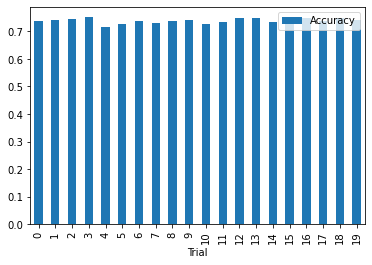

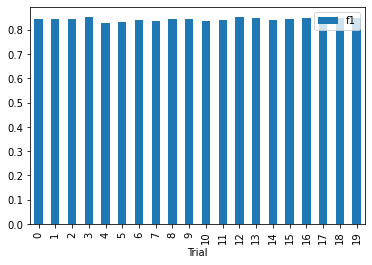

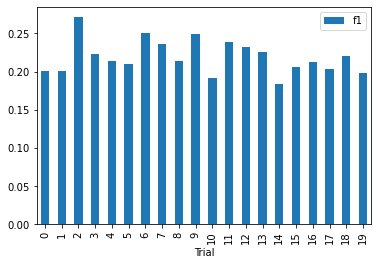

***   f1 average for finding people who pay in full:             0.8433
***   f1 average for finding people who will not pay in full:    0.2192
***   Accuracy average for finding if loan will be paid or not:  0.7391


In [55]:
accuracyValues = []
f1a = []
f1b = []
for i in range(20):
    X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df.drop('not.fully.paid',axis=1), 
                                                    df['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=random.randint(1,1000))
    model3 = DecisionTreeClassifier(max_depth = 50, criterion = 'gini')
    model3.fit(X_train3, Y_train3)
    Y_pred3 = model3.predict(X_test3)
    report3  = classification_report(Y_test3, Y_pred3)
    acc = accuracy_score(Y_test3, Y_pred3)
    accuracyValues.append(acc)
    rep = precision_recall_fscore_support(Y_test3, Y_pred3, average = None)
    f1a.append(rep[2][0])
    f1b.append(rep[2][1])
    print('Trial {}:\t Accuracy Score: {}\t f1-score: {} '.format(i, acc.round(3), rep[2]))
accFrame = pd.DataFrame({'Trial': range(20), "Accuracy": accuracyValues})
accFrame.plot.bar(x='Trial',y='Accuracy')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1": f1a})
accFrame.plot.bar(x='Trial',y='f1')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1": f1b})
accFrame.plot.bar(x='Trial',y='f1')
plt.show()

print("***   f1 average for finding people who pay in full:            ", mean(f1a).round(4))
print("***   f1 average for finding people who will not pay in full:   ", mean(f1b).round(4))
print("***   Accuracy average for finding if loan will be paid or not: ", mean(accuracyValues).round(4))

## The value for the f1-score average for target variable = 1 is slightly better, so the depth of 50 seems to have returned the best cross validated average. As of now, running a decision tree with criterion gini, depth of 50 and all columnsas features has returned the best f1-score for target = 1, that is 0.2192

## UPDATE: I have multiple files running models. On one of them, I see that criterion entropy and depth 38 has returned 0.25 for target variable = 1. If we can confirm that in cross validation, we would have a better result than obtained so far. Let's do that!

Trial 0:	 Accuracy Score: 0.745	 f1-score: [0.84728755 0.23547881] 
Trial 1:	 Accuracy Score: 0.739	 f1-score: [0.8433584  0.21135647] 
Trial 2:	 Accuracy Score: 0.723	 f1-score: [0.83211679 0.2162963 ] 
Trial 3:	 Accuracy Score: 0.737	 f1-score: [0.8424679  0.20537125] 
Trial 4:	 Accuracy Score: 0.749	 f1-score: [0.85037406 0.22330097] 
Trial 5:	 Accuracy Score: 0.746	 f1-score: [0.84801003 0.23622047] 
Trial 6:	 Accuracy Score: 0.74	 f1-score: [0.844375   0.20447284] 
Trial 7:	 Accuracy Score: 0.749	 f1-score: [0.84935797 0.24012638] 
Trial 8:	 Accuracy Score: 0.733	 f1-score: [0.84002509 0.20062696] 
Trial 9:	 Accuracy Score: 0.749	 f1-score: [0.84924623 0.25233645] 
Trial 10:	 Accuracy Score: 0.743	 f1-score: [0.84720497 0.18811881] 
Trial 11:	 Accuracy Score: 0.734	 f1-score: [0.84085213 0.19873817] 
Trial 12:	 Accuracy Score: 0.737	 f1-score: [0.84150943 0.21981424] 
Trial 13:	 Accuracy Score: 0.732	 f1-score: [0.83801705 0.2215478 ] 
Trial 14:	 Accuracy Score: 0.748	 f1-score: [

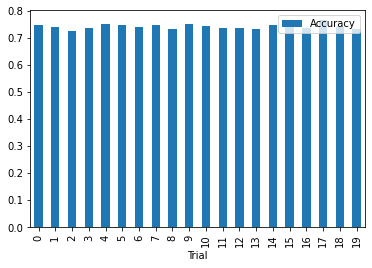

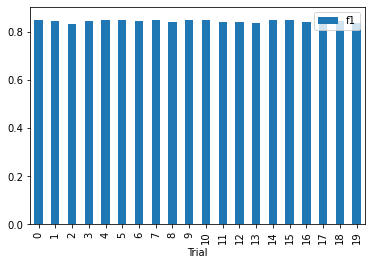

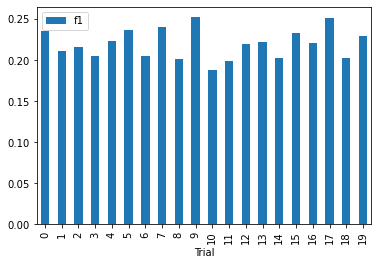

***   f1 average for finding people who pay in full:             0.8449
***   f1 average for finding people who will not pay in full:    0.2196
***   Accuracy average for finding if loan will be paid or not:  0.7413


In [57]:
accuracyValues = []
f1a = []
f1b = []
for i in range(20):
    X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df.drop('not.fully.paid',axis=1), 
                                                    df['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=random.randint(1,1000))
    model3 = DecisionTreeClassifier(max_depth = 38, criterion = 'entropy')
    model3.fit(X_train3, Y_train3)
    Y_pred3 = model3.predict(X_test3)
    report3  = classification_report(Y_test3, Y_pred3)
    acc = accuracy_score(Y_test3, Y_pred3)
    accuracyValues.append(acc)
    rep = precision_recall_fscore_support(Y_test3, Y_pred3, average = None)
    f1a.append(rep[2][0])
    f1b.append(rep[2][1])
    print('Trial {}:\t Accuracy Score: {}\t f1-score: {} '.format(i, acc.round(3), rep[2]))
accFrame = pd.DataFrame({'Trial': range(20), "Accuracy": accuracyValues})
accFrame.plot.bar(x='Trial',y='Accuracy')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1": f1a})
accFrame.plot.bar(x='Trial',y='f1')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1": f1b})
accFrame.plot.bar(x='Trial',y='f1')
plt.show()

print("***   f1 average for finding people who pay in full:            ", mean(f1a).round(4))
print("***   f1 average for finding people who will not pay in full:   ", mean(f1b).round(4))
print("***   Accuracy average for finding if loan will be paid or not: ", mean(accuracyValues).round(4))

## The cross validation improves the f1-score for the target minimally, going from 0.2192 to 0.2196. Still, the best cross validated average is found at depth 38, with value 0.2196 for target variable. The plot for target = 1 also shows less oscilations than in previous models so it is in fact, better.

## To finish Tree style of data analysis, let's run a random forest and see if we can get a higher f1-score average pair!

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train) ## from the previous data set
rfc_result = rfc.predict(X_test)
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(Y_test, rfc_result ))
print("\nAccuracy Score for Decision Tree: ", accuracy_score(Y_test, rfc_result))
print("\nClassification Report for Decision Tree:\n", classification_report(Y_test, rfc_result))

Confusion Matrix for Decision Tree:
 [[1616    7]
 [ 281    9]]

Accuracy Score for Decision Tree:  0.8494511238891793

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.56      0.03      0.06       290

    accuracy                           0.85      1913
   macro avg       0.71      0.51      0.49      1913
weighted avg       0.81      0.85      0.79      1913



## Unfortunately, the random forest did not return a better f1-score average pair than the cross validated Decision Tree. Therefore, the highest cross validated f1-score average pair was produced with a Decision Tree of depth 38 and entropy parameters. This models returned cross validated average of 0.2196 f1-score for target variable = 1. This clearly shows the power of decision trees in comparison to others when applied to large and more complex data, such as real data related to loan payment history. Still a very low number, which makes me question my project so far.

## At this point, I want to review the document as a whole, check logic and retrace my thinking. I already tried a wide array of parameters for each of the three models so far: Logistic Regression, SVM and Decision Trees. Still, the best f1-score is below 0.25 and that does not make me happy nor satisfied. I have other projects for other class and, time permitting, I want to add to the project an exploration of naive-bayes modeling and try to get the f1-score a bit higher. Case it is not below, I will submit as is and try that over the winter!

## Alright let's do this! I am going to run Naive Bayes algorithm to model two different sets of features that were successful so far: top six correlations to target variable and all columns  features.

In [59]:
from sklearn.naive_bayes import GaussianNB

print("\n******  Naive Bayes using top 6 correlations  ******\n")       
X_train, X_test, Y_train, Y_test = train_test_split(df_top_six.drop('not.fully.paid',axis=1), 
                                                        df_top_six['not.fully.paid'],
                                                        test_size=0.2, random_state=101)
model = GaussianNB()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

print("\n******  Naive Bayes using all features correlations  ******\n")
model = GaussianNB()        
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('not.fully.paid',axis=1), 
                                                        df['not.fully.paid'],
                                                        test_size=0.2, random_state=101)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))




******  Naive Bayes using top 6 correlations  ******

Confusion Matrix:
 [[1417  206]
 [ 203   87]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1623
           1       0.30      0.30      0.30       290

    accuracy                           0.79      1913
   macro avg       0.59      0.59      0.59      1913
weighted avg       0.79      0.79      0.79      1913

0.786199686356508

******  Naive Bayes using all features correlations  ******

Confusion Matrix:
 [[1541   82]
 [ 262   28]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1623
           1       0.25      0.10      0.14       290

    accuracy                           0.82      1913
   macro avg       0.55      0.52      0.52      1913
weighted avg       0.76      0.82      0.78      1913

0.8201777313120753


## How is that to save best for last? Or was it just random luck - again?Using Naives Bayes with top 6 correlations gave a f1-score average pair of [0.87,0.30] which is the highest values for our target variable = 1. Let's cross validate and check for consistency.


In [60]:
df_top_six.head()

credit.policy  int.rate  fico  inq.last.6mths  revol.util  small_business  \
0              1    0.1189   737               0        52.1               0   
1              1    0.1071   707               0        76.7               0   
2              1    0.1357   682               1        25.6               0   
3              1    0.1008   712               1        73.2               0   
4              1    0.1426   667               0        39.5               0   

   not.fully.paid  
0               0  
1               0  
2               0  
3               0  
4               0

Trial 0:	 Accuracy Score: 0.764	 f1-score: [0.85830721 0.28930818] 
Trial 1:	 Accuracy Score: 0.768	 f1-score: [0.86037736 0.3126935 ] 
Trial 2:	 Accuracy Score: 0.765	 f1-score: [0.85902669 0.29953198] 
Trial 3:	 Accuracy Score: 0.772	 f1-score: [0.86432785 0.27768595] 
Trial 4:	 Accuracy Score: 0.771	 f1-score: [0.8635514  0.28896104] 
Trial 5:	 Accuracy Score: 0.772	 f1-score: [0.86366479 0.30573248] 
Trial 6:	 Accuracy Score: 0.772	 f1-score: [0.86373558 0.29402262] 
Trial 7:	 Accuracy Score: 0.778	 f1-score: [0.86881188 0.28619529] 
Trial 8:	 Accuracy Score: 0.786	 f1-score: [0.87349211 0.31028668] 
Trial 9:	 Accuracy Score: 0.787	 f1-score: [0.87356322 0.32948929] 
Trial 10:	 Accuracy Score: 0.757	 f1-score: [0.85463659 0.2681388 ] 
Trial 11:	 Accuracy Score: 0.771	 f1-score: [0.86422815 0.27      ] 
Trial 12:	 Accuracy Score: 0.773	 f1-score: [0.86325055 0.3255814 ] 
Trial 13:	 Accuracy Score: 0.758	 f1-score: [0.85444829 0.28217054] 
Trial 14:	 Accuracy Score: 0.773	 f1-score: 

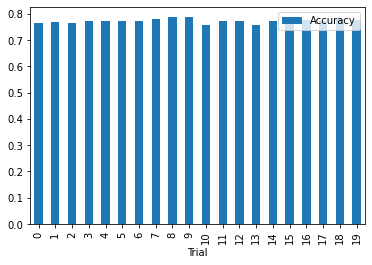

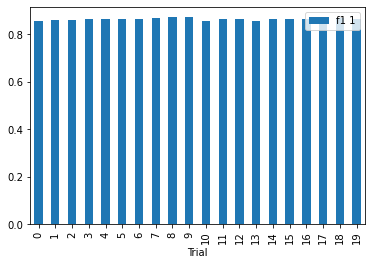

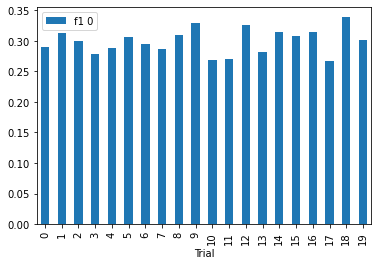

***   f1 average for finding people who pay in full:             0.8641
***   f1 average for finding people who will not pay in full:    0.2992
***   Accuracy average for finding if loan will be paid or not:  0.7725


In [62]:
accuracyValues = []
f1a = []
f1b = []
for i in range(20):
    
    X_train, X_test, Y_train, Y_test = train_test_split(df_top_six.drop(['not.fully.paid'] ,axis=1), 
                                                    df_top_six['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=random.randint(1,1000))
    model = GaussianNB()
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    accuracyValues.append(acc)
    rep = precision_recall_fscore_support(Y_test, Y_pred, average = None)
    f1a.append(rep[2][0])
    f1b.append(rep[2][1])
    print('Trial {}:\t Accuracy Score: {}\t f1-score: {} '.format(i, acc.round(3), rep[2]))
accFrame = pd.DataFrame({'Trial': range(20), "Accuracy": accuracyValues})
accFrame.plot.bar(x='Trial',y='Accuracy')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1 1": f1a})
accFrame.plot.bar(x='Trial',y='f1 1')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1 0": f1b})
accFrame.plot.bar(x='Trial',y='f1 0')
plt.show()

print("***   f1 average for finding people who pay in full:            ", mean(f1a).round(4))
print("***   f1 average for finding people who will not pay in full:   ", mean(f1b).round(4))
print("***   Accuracy average for finding if loan will be paid or not: ", mean(accuracyValues).round(4))

## In our final development, we realize that random state 101 for the six top correlations, was not produced by chance and the high value of 0.30 for the f1-score in study is confirmed in cross validation. The cross validation and plot show a consistent result for that value proving to be the model to study target variable = 1.

## Just in case, let's cross validate the Naives Bayes model with all columns as features and see if similar behavious is seen.

Trial 0:	 Accuracy Score: 0.818	 f1-score: [0.89776733 0.17535545] 
Trial 1:	 Accuracy Score: 0.809	 f1-score: [0.89209906 0.15668203] 
Trial 2:	 Accuracy Score: 0.822	 f1-score: [0.90032154 0.15802469] 
Trial 3:	 Accuracy Score: 0.817	 f1-score: [0.89703725 0.15827338] 
Trial 4:	 Accuracy Score: 0.821	 f1-score: [0.90040769 0.12755102] 
Trial 5:	 Accuracy Score: 0.828	 f1-score: [0.90399767 0.1754386 ] 
Trial 6:	 Accuracy Score: 0.826	 f1-score: [0.90243188 0.1937046 ] 
Trial 7:	 Accuracy Score: 0.81	 f1-score: [0.89339207 0.13776722] 
Trial 8:	 Accuracy Score: 0.811	 f1-score: [0.89404168 0.13842482] 
Trial 9:	 Accuracy Score: 0.813	 f1-score: [0.89533861 0.13975904] 
Trial 10:	 Accuracy Score: 0.826	 f1-score: [0.90203001 0.22014052] 
Trial 11:	 Accuracy Score: 0.828	 f1-score: [0.90438826 0.14545455] 
Trial 12:	 Accuracy Score: 0.828	 f1-score: [0.90461003 0.12732095] 
Trial 13:	 Accuracy Score: 0.819	 f1-score: [0.89877121 0.15196078] 
Trial 14:	 Accuracy Score: 0.817	 f1-score: [

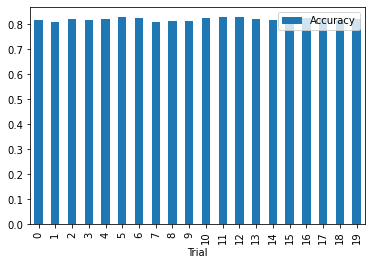

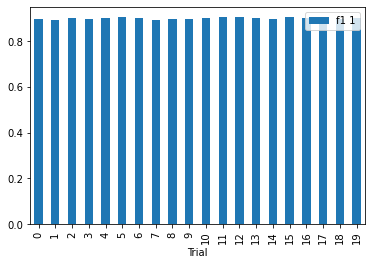

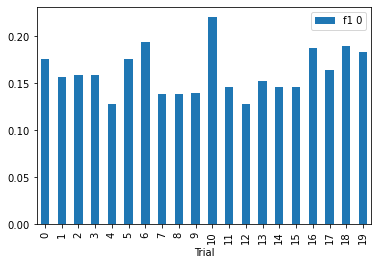

***   f1 average for finding people who pay in full:             0.8994
***   f1 average for finding people who will not pay in full:    0.1611
***   Accuracy average for finding if loan will be paid or not:  0.8204


In [63]:
accuracyValues = []
f1a = []
f1b = []
for i in range(20):
    X_train, X_test, Y_train, Y_test = train_test_split(df.drop('not.fully.paid',axis=1), 
                                                    df['not.fully.paid'], 
                                                    test_size=0.20, 
                                                    random_state=random.randint(1,1000))

    model = GaussianNB()
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    accuracyValues.append(acc)
    rep = precision_recall_fscore_support(Y_test, Y_pred, average = None)
    f1a.append(rep[2][0])
    f1b.append(rep[2][1])
    print('Trial {}:\t Accuracy Score: {}\t f1-score: {} '.format(i, acc.round(3), rep[2]))
accFrame = pd.DataFrame({'Trial': range(20), "Accuracy": accuracyValues})
accFrame.plot.bar(x='Trial',y='Accuracy')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1 1": f1a})
accFrame.plot.bar(x='Trial',y='f1 1')
plt.show()

accFrame = pd.DataFrame({'Trial': range(20), "f1 0": f1b})
accFrame.plot.bar(x='Trial',y='f1 0')
plt.show()

print("***   f1 average for finding people who pay in full:            ", mean(f1a).round(4))
print("***   f1 average for finding people who will not pay in full:   ", mean(f1b).round(4))
print("***   Accuracy average for finding if loan will be paid or not: ", mean(accuracyValues).round(4))

## The second Naive Bayes model shows inconsistencies with f1-score for target = 1, suggesting that all features is not a good choice.
<br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

# Conclusion

## After running Logistic Regression, SVM, Decision Trees and Naive Bayes modeling with a wide array of parameters, the best 20 fold cross validated average for the f1-score of not.fully.paid = 1 was produced by the Naive Bayes model using top six correlations as features. That value pair is[0.8641, 0.2992], that is, 0.2992 for the target variable 'not.fully.paid' = 1. I am happier with the result and really glad that I also ran the Naive Bayes model for the data set as it signigicantly improved the cross validated result. Below is a summary table with the best cross validated averages for f1-score.
<br><br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />



<pre>
    <div style="text-align:center;">
        <h3 style="text-align:center;"><b>Result table</b></h3>
        <table style="width:80%">
            <tr>
                <th style="text-align:center">Model</th>
                <th style="text-align:center">Cross Validation</th>
                <th style="text-align:center">f1-score Average&nbsp;<sup>VM</sup></th>
            </tr>
            <tr>
                <td style="text-align:center">Logistic Regression</td>     
                <td style="text-align:center">20 fold</td>    
                <td style="text-align:center">[0.9128,0.0285]</td>
            </tr>
            <tr>
                <td style="text-align:center">SVM</td>
                <td style="text-align:center">20 fold</td>     
                <td style="text-align:center">[0.9088,0.1196]</td>
            </tr>
            <tr>
                <td style="text-align:center">Decision Tree</td>     
                <td style="text-align:center">20 fold</td>     
                <td style="text-align:center">[0.8449,0.2196]</td>
            </tr>
            <tr>
                <td style="text-align:center">Naive Bayes</td>
                <td style="text-align:center">20 fold</td>
                <td style="text-align:center">[0.8641,0.2992]</td>
            </tr>
        </table>
        <p><b><sup>VM&nbsp;&nbsp;</sup></b><i>- The f1-scores are 20 fold cross validated average pairs for ['not.fully.paid' = 0, 'not.fully.paid' = 1]</i></p>
    </div>
</pre>

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

<pre>
                                                 Vagner Machado
                                             Professor Chiuyan Pang
                                                 Data Analytics
                                                 Queens College
                                                   Fall 2020
</pre>



<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />